# FINAL PROJECT
How do newspapers cover and frame technological materials (platforms, programs, services) over time? How are those technological materials positively or negatively associated with ideas of the "future"? Given how certain technologies were framed, I aim to predict how the press will receive and talk about future technological developments.
I'm extracting my sample from the NOW corpora (US - filtering by articles that talk about "technology").

Technological innovations (e.g., AI, Blockchain, Cryptocurrencies, Social Media Networks):
a) will be generally framed negatively in news corpora across the years.
b) we'll be able to see different gradients: skepticism, rejection, demonization.
Perceived social media's negative impact on society will increase over the years.

#Set up
Loading Packages

In [ ]:
%%capture 
!pip install -U git+git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

In [ ]:
!pip install -U git+git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

  Cloning git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git to /tmp/pip-req-build-oljcc8zo
  Running command git clone -q git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git /tmp/pip-req-build-oljcc8zo
  fatal: remote error:
    The unauthenticated git protocol on port 9418 is no longer supported.
  Please see https://github.blog/2021-09-01-improving-git-protocol-security-github/ for more information.
ERROR: Command errored out with exit status 128: git clone -q git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git /tmp/pip-req-build-oljcc8zo Check the logs for full command output.


In [ ]:
import lucem_illud #pip install -U git+git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git


ModuleNotFoundError: ignored

## Special models

In [ ]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
#All these packages need to be installed from pip
#These are all for the cluster detection
import sklearn
import sklearn.feature_extraction.text
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.datasets
import sklearn.cluster
import sklearn.decomposition
import sklearn.metrics

import scipy #For hierarchical clustering and some visuals
#import scipy.cluster.hierarchy
import gensim#For topic modeling
import requests #For downloading our datasets
import numpy as np #for arrays
import pandas #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import matplotlib.cm #Still for graphics
import seaborn as sns #Makes the graphics look nicer
import wordcloud #Makes word clouds


#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning, it
%matplotlib inline

import itertools
import json

In [ ]:
# statsmodels is a popular Python statistics package
import statsmodels.api as sm
# Let's also import its graphics module
import statsmodels.graphics.api as smg
# And the mediation module
from statsmodels.stats.mediation import Mediation

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
import os
import zipfile
import pandas as pd

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


## Importing dataset

In [ ]:
#first time
#news_df = pd.read_excel('/content/drive/MyDrive/SOCI Computational Content Analysis/data/Final Project NOW/NOW_technologies_allcountries.xlsx')

#second - with cleaned dataset
news_df = pd.read_excel('/content/drive/MyDrive/SOCI Computational Content Analysis/data/Final Project NOW/NOW corpora final project_cleaned.xlsx')

#with POS tagging
#news_df_reduced = pd.read_excel('/content/drive/MyDrive/SOCI Computational Content Analysis/data/Final Project NOW/NOW corpora final project_postagged.xlsx')

In [ ]:
news_df

,Unnamed: 0,length,date,country,publisher,body,tokenized_words,normalized_words,tokenized_sents,normalized_sents
0,0,362,2001-08-17,GB,90min,reports emerged on Monday night over Barcelona...,"['Conflicting', 'reports', 'emerged', 'on', 'M...","['conflicting', 'reports', 'emerged', 'monday'...","[['reports', 'emerged', 'on', 'Monday', 'night...","[['report', 'emerge', 'monday', 'night', 'barc..."
1,1,214,2001-08-17,GB,Telegraph.co.uk,'s value passes $800bn as it dispels fears of ...,"['Apple', ""'s"", 'value', 'passes', '$', '800bn...","['apple', 'value', 'passes', '$', '800bn', 'di...","[[""'s"", 'value', 'passes', '$', '800bn', 'as',...","[['value', 'pass', '$', '800bn', 'dispel', 'fe..."
2,2,654,2001-08-17,GB,EuropeanCEO,"digitalisation enters new territories , EU por...","['As', 'digitalisation', 'enters', 'new', 'ter...","['digitalisation', 'enters', 'new', 'territori...","[['digitalisation', 'enters', 'new', 'territor...","[['digitalisation', 'enter', 'new', 'territory..."
3,3,2320,2001-08-17,GB,Express.co.uk,traders are on a knife-edge after the cryptocu...,"['BITCOIN', 'traders', 'are', 'on', 'a', 'knif...","['bitcoin', 'traders', 'knife', 'edge', 'crypt...","[['traders', 'are', 'on', 'a', 'knife', 'edge'...","[['trader', 'knife', 'edge', 'cryptocurrency',..."
4,4,417,2001-08-17,GB,Heat,"website uses cookies . We use technologies , s...","['This', 'website', 'uses', 'cookies', 'We', '...","['website', 'uses', 'cookies', 'use', 'technol...","[['website', 'uses', 'cookies'], ['We', 'use',...","[['website', 'use', 'cooky'], ['use', 'technol..."
...,...,...,...,...,...,...,...,...,...,...
17551,17551,1006,2014-01-19,JM,"Government of Jamaica, Jamaica Information Ser...",Farmworker Wants to Take Care of His Family JI...,"['Rookie', 'Farmworker', 'Wants', 'to', 'Take'...","['rookie', 'farmworker', 'wants', 'care', 'fam...","[['Farmworker', 'Wants', 'to', 'Take', 'Care',...","[['farmworker', 'want', 'care', 'family', 'jis..."
17552,17552,221,2016-01-19,JM,Loop News Jamaica,"When we first started , we got jobs simple job...","['When', 'we', 'first', 'started', 'we', 'got'...","['started', 'got', 'jobs', 'simple', 'jobs', '...","[['When', 'we', 'first', 'started', 'we', 'got...","[['start', 'get', 'job', 'simple', 'job', 'lik..."
17553,17553,580,2016-01-19,JM,"Government of Jamaica, Jamaica Information Ser...",Highlights The Government is to table a Bill e...,"['Story', 'Highlights', 'The', 'Government', '...","['story', 'highlights', 'government', 'table',...","[['Highlights'], ['The', 'Government', 'is', '...","[['highlight'], ['government', 'table', 'bill'..."
17554,17554,773,2016-01-19,JM,"Government of Jamaica, Jamaica Information Ser...",Ministry Launches New eLibrary Project Educati...,"['Education', 'Ministry', 'Launches', 'New', '...","['education', 'ministry', 'launches', 'new', '...","[['Ministry', 'Launches', 'New', 'eLibrary', '...","[['ministry', 'launch', 'new', 'elibrary', 'pr..."


In [ ]:
def date_to_time(date):
    return int(''.join(str(date).split('-')[:2]))

news_df['time'] = news_df['date'].apply(date_to_time)

news_df['length_w'] = news_df['length']

news_df['length_c'] = news_df['body'].apply(len)

news_df

,Unnamed: 0,length,date,country,publisher,body,tokenized_words,normalized_words,tokenized_sents,normalized_sents,time,length_w,length_c
0,0,362,2001-08-17,GB,90min,reports emerged on Monday night over Barcelona...,"['Conflicting', 'reports', 'emerged', 'on', 'M...","['conflicting', 'reports', 'emerged', 'monday'...","[['reports', 'emerged', 'on', 'Monday', 'night...","[['report', 'emerge', 'monday', 'night', 'barc...",200108,362,2189
1,1,214,2001-08-17,GB,Telegraph.co.uk,'s value passes $800bn as it dispels fears of ...,"['Apple', ""'s"", 'value', 'passes', '$', '800bn...","['apple', 'value', 'passes', '$', '800bn', 'di...","[[""'s"", 'value', 'passes', '$', '800bn', 'as',...","[['value', 'pass', '$', '800bn', 'dispel', 'fe...",200108,214,1255
2,2,654,2001-08-17,GB,EuropeanCEO,"digitalisation enters new territories , EU por...","['As', 'digitalisation', 'enters', 'new', 'ter...","['digitalisation', 'enters', 'new', 'territori...","[['digitalisation', 'enters', 'new', 'territor...","[['digitalisation', 'enter', 'new', 'territory...",200108,654,4343
3,3,2320,2001-08-17,GB,Express.co.uk,traders are on a knife-edge after the cryptocu...,"['BITCOIN', 'traders', 'are', 'on', 'a', 'knif...","['bitcoin', 'traders', 'knife', 'edge', 'crypt...","[['traders', 'are', 'on', 'a', 'knife', 'edge'...","[['trader', 'knife', 'edge', 'cryptocurrency',...",200108,2320,14034
4,4,417,2001-08-17,GB,Heat,"website uses cookies . We use technologies , s...","['This', 'website', 'uses', 'cookies', 'We', '...","['website', 'uses', 'cookies', 'use', 'technol...","[['website', 'uses', 'cookies'], ['We', 'use',...","[['website', 'use', 'cooky'], ['use', 'technol...",200108,417,2331
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17551,17551,1006,2014-01-19,JM,"Government of Jamaica, Jamaica Information Ser...",Farmworker Wants to Take Care of His Family JI...,"['Rookie', 'Farmworker', 'Wants', 'to', 'Take'...","['rookie', 'farmworker', 'wants', 'care', 'fam...","[['Farmworker', 'Wants', 'to', 'Take', 'Care',...","[['farmworker', 'want', 'care', 'family', 'jis...",201401,1006,5851
17552,17552,221,2016-01-19,JM,Loop News Jamaica,"When we first started , we got jobs simple job...","['When', 'we', 'first', 'started', 'we', 'got'...","['started', 'got', 'jobs', 'simple', 'jobs', '...","[['When', 'we', 'first', 'started', 'we', 'got...","[['start', 'get', 'job', 'simple', 'job', 'lik...",201601,221,1299
17553,17553,580,2016-01-19,JM,"Government of Jamaica, Jamaica Information Ser...",Highlights The Government is to table a Bill e...,"['Story', 'Highlights', 'The', 'Government', '...","['story', 'highlights', 'government', 'table',...","[['Highlights'], ['The', 'Government', 'is', '...","[['highlight'], ['government', 'table', 'bill'...",201601,580,3571
17554,17554,773,2016-01-19,JM,"Government of Jamaica, Jamaica Information Ser...",Ministry Launches New eLibrary Project Educati...,"['Education', 'Ministry', 'Launches', 'New', '...","['education', 'ministry', 'launches', 'new', '...","[['Ministry', 'Launches', 'New', 'eLibrary', '...","[['ministry', 'launch', 'new', 'elibrary', 'pr...",201601,773,4886


In [ ]:
from collections import Counter
publishers_count = sorted(list(dict(Counter(news_df['publisher'])).items()), key=lambda x: x[1], reverse=True)
publishers_count

In [ ]:
news_df['time'].value_counts()

201809    853
201909    820
200609    777
200509    769
201709    755
201109    739
201209    716
200709    635
201309    607
201609    489
200809    441
201009    418
201001    389
201401    379
200801    362
201501    337
200901    324
201409    313
200201    301
200701    298
201008    274
200401    273
200908    271
201408    267
200708    266
201101    265
200808    265
200108    253
201508    253
200208    250
200301    250
200101    244
201301    241
200308    238
200601    233
201708    227
200408    225
201509    207
201601    201
200909    192
201201    189
200501    185
200409    178
201808    169
201608    163
201701    159
201108    157
200608    147
201308    142
200508    107
201801    102
201908     96
201208     59
201901     52
200109     19
200209     11
200309      4
Name: time, dtype: int64

In [ ]:
news_df['country'].value_counts()

IN    3467
NG    2897
ZA    2884
US    2017
SG    1385
MY    1192
PH     896
GB     768
NZ     561
BD     336
PK     329
HK     293
KE     242
LK     239
JM      50
Name: country, dtype: int64

In [ ]:
news_df['publisher'].value_counts()

NEWSTAGE              1354
THISDAY Newspapers     850
KL Daily               555
Times of India         533
The South African      427
                      ... 
BBC Sport                1
WinBuzzer                1
New York Post            1
SmartBrief               1
White River Post         1
Name: publisher, Length: 1675, dtype: int64

In [ ]:
#now i choose middle range amount of characters 
n, m = 1000, 4000
len_texts = news_df['body'].apply(len)
news_df_reduced = news_df[(len_texts > n) & (len_texts < m)] # filtering text between n and m parameters. 
news_df_reduced 

,Unnamed: 0,length,date,country,publisher,body,tokenized_words,normalized_words,tokenized_sents,normalized_sents,time,length_w,length_c
0,0,362,2001-08-17,GB,90min,reports emerged on Monday night over Barcelona...,"['Conflicting', 'reports', 'emerged', 'on', 'M...","['conflicting', 'reports', 'emerged', 'monday'...","[['reports', 'emerged', 'on', 'Monday', 'night...","[['report', 'emerge', 'monday', 'night', 'barc...",200108,362,2189
1,1,214,2001-08-17,GB,Telegraph.co.uk,'s value passes $800bn as it dispels fears of ...,"['Apple', ""'s"", 'value', 'passes', '$', '800bn...","['apple', 'value', 'passes', '$', '800bn', 'di...","[[""'s"", 'value', 'passes', '$', '800bn', 'as',...","[['value', 'pass', '$', '800bn', 'dispel', 'fe...",200108,214,1255
4,4,417,2001-08-17,GB,Heat,"website uses cookies . We use technologies , s...","['This', 'website', 'uses', 'cookies', 'We', '...","['website', 'uses', 'cookies', 'use', 'technol...","[['website', 'uses', 'cookies'], ['We', 'use',...","[['website', 'use', 'cooky'], ['use', 'technol...",200108,417,2331
6,6,219,2001-08-17,GB,Empire,"website uses cookies . We use technologies , s...","['This', 'website', 'uses', 'cookies', 'We', '...","['website', 'uses', 'cookies', 'use', 'technol...","[['website', 'uses', 'cookies'], ['We', 'use',...","[['website', 'use', 'cooky'], ['use', 'technol...",200108,219,1296
7,7,243,2001-08-17,GB,Press Release Rocket (press release),"1994 , Zymo Research has provided reliable , i...","['Since', '1994', 'Zymo', 'Research', 'has', '...","['zymo', 'research', 'provided', 'reliable', '...","[['1994', 'Zymo', 'Research', 'has', 'provided...","[['zymo', 'research', 'provide', 'reliable', '...",200108,243,1550
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17549,17549,555,2011-01-19,JM,"Government of Jamaica, Jamaica Information Ser...","Highlights Minister of Transport and Mining , ...","['Story', 'Highlights', 'Minister', 'of', 'Tra...","['story', 'highlights', 'minister', 'transport...","[['Highlights', 'Minister', 'of', 'Transport',...","[['highlight', 'minister', 'transport', 'mine'...",201101,555,3655
17550,17550,448,2011-01-19,JM,Loop News Jamaica,tells HEART Trust to intensify training of BPO...,"['Holness', 'tells', 'HEART', 'Trust', 'to', '...","['holness', 'tells', 'heart', 'trust', 'intens...","[['tells', 'HEART', 'Trust', 'to', 'intensify'...","[['tell', 'heart', 'trust', 'intensify', 'trai...",201101,448,2554
17552,17552,221,2016-01-19,JM,Loop News Jamaica,"When we first started , we got jobs simple job...","['When', 'we', 'first', 'started', 'we', 'got'...","['started', 'got', 'jobs', 'simple', 'jobs', '...","[['When', 'we', 'first', 'started', 'we', 'got...","[['start', 'get', 'job', 'simple', 'job', 'lik...",201601,221,1299
17553,17553,580,2016-01-19,JM,"Government of Jamaica, Jamaica Information Ser...",Highlights The Government is to table a Bill e...,"['Story', 'Highlights', 'The', 'Government', '...","['story', 'highlights', 'government', 'table',...","[['Highlights'], ['The', 'Government', 'is', '...","[['highlight'], ['government', 'table', 'bill'...",201601,580,3571


In [ ]:
#randominly select 10% of the total to work with in some particular examples.
news_df_r10 = news_df_reduced.sample(frac=0.10)
news_df_r10

,Unnamed: 0,length,date,country,publisher,body,tokenized_words,normalized_words,tokenized_sents,normalized_sents,time,length_w,length_c,body_clean
5482,5482,273,2013-09-18,BD,bdnews24.com,"have arrested Fuad Zaman , the son-in-law of B...","[have, arrested, fuad, zaman, ,, the, son-in-l...","['police', 'arrested', 'fuad', 'zaman', 'son',...","[[have, arrested, fuad, zaman, ,, the, son-in-...","[['arrest', 'fuad', 'zaman', 'son', 'law', 'ba...",201309,273,1633,have arrested fuad zaman the soninlaw of bang...
17374,17374,396,2017-01-19,ZA,The South African,"Bosasa COO , Angelo Agrizzi said he fears for ...","[bosasa, coo, ,, angelo, agrizzi, said, he, fe...","['bosasa', 'coo', 'angelo', 'agrizzi', 'said',...","[[bosasa, coo, ,, angelo, agrizzi, said, he, f...","[['bosasa', 'coo', 'angelo', 'agrizzi', 'say',...",201701,396,2373,bosasa coo angelo agrizzi said he fears for h...
15269,15269,536,2014-01-19,IN,Financial Express,"shares on defensive , sterling braces for Brex...","[shares, on, defensive, ,, sterling, braces, f...","['asian', 'shares', 'defensive', 'sterling', '...","[[shares, on, defensive, ,, sterling, braces, ...","[['share', 'defensive', 'sterling', 'brace', '...",201401,536,3129,shares on defensive sterling braces for brexi...
11110,11110,573,2019-09-18,NG,THISDAY Newspapers,"New Transfer Pricing Regulation , Game-changer...","[new, transfer, pricing, regulation, ,, game-c...","['new', 'transfer', 'pricing', 'regulation', '...","[[new, transfer, pricing, regulation, ,, game-...","[['new', 'transfer', 'price', 'regulation', 'g...",201909,573,3493,new transfer pricing regulation gamechanger f...
8322,8322,454,2010-09-18,NG,NEWSTAGE,Business Development Program Offers Access to ...,"[business, development, program, offers, acces...","['federal', 'business', 'development', 'progra...","[[business, development, program, offers, acce...","[['business', 'development', 'program', 'offer...",201009,454,3126,business development program offers access to ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10415,10415,329,2018-09-18,SG,Channel NewsAsia,EU to scrap lawsuit against Ireland after App...,"[eu, to, scrap, lawsuit, against, ireland, aft...","['search', 'eu', 'scrap', 'lawsuit', 'ireland'...","[[eu, to, scrap, lawsuit, against, ireland, af...","[['eu', 'scrap', 'lawsuit', 'ireland', 'apple'...",201809,329,2072,eu to scrap lawsuit against ireland after app...
10208,10208,542,2018-09-18,NG,THISDAY Newspapers,Assurance to Issue 40bn Shares for Fresh Capit...,"[assurance, to, issue, 40bn, shares, for, fres...","['lasaco', 'assurance', 'issue', '40bn', 'shar...","[[assurance, to, issue, 40bn, shares, for, fre...","[['assurance', 'issue', '40bn', 'share', 'fres...",201809,542,3193,assurance to issue 40bn shares for fresh capit...
11164,11164,563,2019-09-18,SG,OpenGov Asia,: Frontier of technology to be explored in 2-...,"[:, frontier, of, technology, to, be, explored...","['articles', 'frontier', 'technology', 'explor...","[[:, frontier, of, technology, to, be, explore...","[['frontier', 'technology', 'explore', '2-day'...",201909,563,3617,frontier of technology to be explored in 2da...
9373,9373,675,2013-09-18,SG,Yahoo News,EU copyright overhaul ' break ' the internet ?...,"[eu, copyright, overhaul, ', break, ', the, in...","['eu', 'copyright', 'overhaul', 'break', 'inte...","[[eu, copyright, overhaul, ', break, ', the, i...","[['eu', 'copyright', 'overhaul', 'break', 'int...",201309,675,3969,eu copyright overhaul break the internet op...


## Data cleaning

(already done first time)

In [ ]:
news_df_reduced  = news_df_reduced.drop(news_df.columns[[1,2]], axis=1)
news_df_reduced 

In [ ]:
news_df_reduced  = news_df_reduced.reset_index()
news_df_reduced 

,level_0,index,Unnamed: 0,length,date,country,publisher,body,tokenized_words,normalized_words,tokenized_sents,normalized_sents,time,length_w,length_c,kmeans_predictions
0,0,0,0,362,2001-08-17,GB,90min,reports emerged on Monday night over Barcelona...,"['Conflicting', 'reports', 'emerged', 'on', 'M...","['conflicting', 'reports', 'emerged', 'monday'...","[['reports', 'emerged', 'on', 'Monday', 'night...","[['report', 'emerge', 'monday', 'night', 'barc...",200108,362,2189,0
1,1,1,1,214,2001-08-17,GB,Telegraph.co.uk,'s value passes $800bn as it dispels fears of ...,"['Apple', ""'s"", 'value', 'passes', '$', '800bn...","['apple', 'value', 'passes', '$', '800bn', 'di...","[[""'s"", 'value', 'passes', '$', '800bn', 'as',...","[['value', 'pass', '$', '800bn', 'dispel', 'fe...",200108,214,1255,0
2,2,4,4,417,2001-08-17,GB,Heat,"website uses cookies . We use technologies , s...","['This', 'website', 'uses', 'cookies', 'We', '...","['website', 'uses', 'cookies', 'use', 'technol...","[['website', 'uses', 'cookies'], ['We', 'use',...","[['website', 'use', 'cooky'], ['use', 'technol...",200108,417,2331,0
3,3,6,6,219,2001-08-17,GB,Empire,"website uses cookies . We use technologies , s...","['This', 'website', 'uses', 'cookies', 'We', '...","['website', 'uses', 'cookies', 'use', 'technol...","[['website', 'uses', 'cookies'], ['We', 'use',...","[['website', 'use', 'cooky'], ['use', 'technol...",200108,219,1296,0
4,4,7,7,243,2001-08-17,GB,Press Release Rocket (press release),"1994 , Zymo Research has provided reliable , i...","['Since', '1994', 'Zymo', 'Research', 'has', '...","['zymo', 'research', 'provided', 'reliable', '...","[['1994', 'Zymo', 'Research', 'has', 'provided...","[['zymo', 'research', 'provide', 'reliable', '...",200108,243,1550,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10127,10127,17549,17549,555,2011-01-19,JM,"Government of Jamaica, Jamaica Information Ser...","Highlights Minister of Transport and Mining , ...","['Story', 'Highlights', 'Minister', 'of', 'Tra...","['story', 'highlights', 'minister', 'transport...","[['Highlights', 'Minister', 'of', 'Transport',...","[['highlight', 'minister', 'transport', 'mine'...",201101,555,3655,0
10128,10128,17550,17550,448,2011-01-19,JM,Loop News Jamaica,tells HEART Trust to intensify training of BPO...,"['Holness', 'tells', 'HEART', 'Trust', 'to', '...","['holness', 'tells', 'heart', 'trust', 'intens...","[['tells', 'HEART', 'Trust', 'to', 'intensify'...","[['tell', 'heart', 'trust', 'intensify', 'trai...",201101,448,2554,0
10129,10129,17552,17552,221,2016-01-19,JM,Loop News Jamaica,"When we first started , we got jobs simple job...","['When', 'we', 'first', 'started', 'we', 'got'...","['started', 'got', 'jobs', 'simple', 'jobs', '...","[['When', 'we', 'first', 'started', 'we', 'got...","[['start', 'get', 'job', 'simple', 'job', 'lik...",201601,221,1299,0
10130,10130,17553,17553,580,2016-01-19,JM,"Government of Jamaica, Jamaica Information Ser...",Highlights The Government is to table a Bill e...,"['Story', 'Highlights', 'The', 'Government', '...","['story', 'highlights', 'government', 'table',...","[['Highlights'], ['The', 'Government', 'is', '...","[['highlight'], ['government', 'table', 'bill'...",201601,580,3571,0


In [ ]:
news_df_r25 = news_df_r25.drop(news_df_r25.columns[[0]], axis=1)
news_df_r25

In [ ]:
def clean_raw_text(text):
    # clean_text = text.replace(" \'m", "'m").replace(" \'ll", "'ll").replace(" \'re", "'re").replace(" \'s", "'s").replace(" \'re", "'re").replace(" n\'t", "n't").replace(" \'ve", "'ve").replace(" /'d", "'d")
    clean_text = text.split(' ', 1)[1].replace(r'<p> ', '').replace(r'<h>', '')
    return clean_text
news_df_r25['body'] = news_df_r25['body'].apply(clean_raw_text)
news_df_r25

In [ ]:
dfmean = news_df_reduced[('length_w')].mean()
print("The average number of words per article is: ")
print(dfmean)

The average number of words per article is: 
416.58596525858667


In [ ]:
dfmean = news_df_reduced [('length_c')].mean()
print("The average number of characteres per article is: ")
print(dfmean)

The average number of characteres per article is: 
2591.296782471378


In [ ]:
dfsum = news_df_reduced [('length_w')].sum()
print("The total number of characteres is: ")
print(dfsum)

The total number of characteres is: 
4220849


# Tokenization & Normalization

(already done to the imported dataset)

In [ ]:
#Apply our functions, notice each row is a list of lists now
#news_df_r10['tokenized_sents'] = news_df_r10['body'].apply(lambda x: [lucem_illud.word_tokenize(s) for s in lucem_illud.sent_tokenize(x)])
#news_df_r10['normalized_sents'] = news_df_r10['tokenized_sents'].apply(lambda x: [lucem_illud.normalizeTokens(s) for s in x])

In [ ]:
#news_df_r25['tokenized_words'] = news_df_r25['body'].apply(lambda x: lucem_illud.word_tokenize(x))
#news_df_r25['normalized_words'] = news_df_r25['tokenized_words'].apply(lambda x: lucem_illud.normalizeTokens(x, lemma=False))

In [ ]:
news_df_r25

Tokenize without lucim

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
news_df_reduced['tokenized_sents'][0]

["reports emerged on Monday night over Barcelona 's continued pursuit of Liverpool star Philippe Coutinho , with French publication RMC claiming that the Spanish side have now seen a ?",
 '100m offer rejected for the player .',
 'Barcelona are set to lose Neymar to Paris Saint-Germain in a world-record transfer this month , and are already looking ?',
 'to reinvest the money in their squad - with Coutinho among their top targets .',
 'Respected Liverpool Echo journalist James Pearce has however dismissed the story , saying Barca have not lodged a new bid .',
 'Liverpool have rejected a ?',
 '100m bid from Barcelona for Philippe #Coutinho .',
 'The Catalan giants have been linked with Coutinho for the last couple of summers , though Liverpool remain adamant that they will not sanction a sale for a player who only signed a new contract in January of this year .',
 'Manager Jurgen Klopp reacted to media reports about Barca \'s interest on Monday , with the German telling the club \'s offi

In [ ]:
#with the 10k news

#punctuation
news_df_reduced["body_clean"] = news_df_reduced['body'].str.replace('[^\w\s]','')
#lower
news_df_reduced['body_clean'] = news_df_reduced['body_clean'].str.lower()
#tokenization words
news_df_reduced['tokenized_words'] = news_df_reduced['body'].str.lower().apply(lambda x: nltk.word_tokenize(x))
#tokenization sents
news_df_reduced['tokenized_sents'] = news_df_reduced['body'].str.lower().apply(lambda x: [nltk.word_tokenize(s) for s in nltk.sent_tokenize(x)])

news_df_reduced


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launch

,Unnamed: 0,length,date,country,publisher,body,tokenized_words,normalized_words,tokenized_sents,normalized_sents,time,length_w,length_c,body_clean
0,0,362,2001-08-17,GB,90min,reports emerged on Monday night over Barcelona...,"[reports, emerged, on, monday, night, over, ba...","['conflicting', 'reports', 'emerged', 'monday'...","[[reports, emerged, on, monday, night, over, b...","[['report', 'emerge', 'monday', 'night', 'barc...",200108,362,2189,reports emerged on monday night over barcelona...
1,1,214,2001-08-17,GB,Telegraph.co.uk,'s value passes $800bn as it dispels fears of ...,"['s, value, passes, $, 800bn, as, it, dispels,...","['apple', 'value', 'passes', '$', '800bn', 'di...","[['s, value, passes, $, 800bn, as, it, dispels...","[['value', 'pass', '$', '800bn', 'dispel', 'fe...",200108,214,1255,s value passes 800bn as it dispels fears of ip...
4,4,417,2001-08-17,GB,Heat,"website uses cookies . We use technologies , s...","[website, uses, cookies, ., we, use, technolog...","['website', 'uses', 'cookies', 'use', 'technol...","[[website, uses, cookies, .], [we, use, techno...","[['website', 'use', 'cooky'], ['use', 'technol...",200108,417,2331,website uses cookies we use technologies suc...
6,6,219,2001-08-17,GB,Empire,"website uses cookies . We use technologies , s...","[website, uses, cookies, ., we, use, technolog...","['website', 'uses', 'cookies', 'use', 'technol...","[[website, uses, cookies, .], [we, use, techno...","[['website', 'use', 'cooky'], ['use', 'technol...",200108,219,1296,website uses cookies we use technologies suc...
7,7,243,2001-08-17,GB,Press Release Rocket (press release),"1994 , Zymo Research has provided reliable , i...","[1994, ,, zymo, research, has, provided, relia...","['zymo', 'research', 'provided', 'reliable', '...","[[1994, ,, zymo, research, has, provided, reli...","[['zymo', 'research', 'provide', 'reliable', '...",200108,243,1550,1994 zymo research has provided reliable inn...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17549,17549,555,2011-01-19,JM,"Government of Jamaica, Jamaica Information Ser...","Highlights Minister of Transport and Mining , ...","[highlights, minister, of, transport, and, min...","['story', 'highlights', 'minister', 'transport...","[[highlights, minister, of, transport, and, mi...","[['highlight', 'minister', 'transport', 'mine'...",201101,555,3655,highlights minister of transport and mining h...
17550,17550,448,2011-01-19,JM,Loop News Jamaica,tells HEART Trust to intensify training of BPO...,"[tells, heart, trust, to, intensify, training,...","['holness', 'tells', 'heart', 'trust', 'intens...","[[tells, heart, trust, to, intensify, training...","[['tell', 'heart', 'trust', 'intensify', 'trai...",201101,448,2554,tells heart trust to intensify training of bpo...
17552,17552,221,2016-01-19,JM,Loop News Jamaica,"When we first started , we got jobs simple job...","[when, we, first, started, ,, we, got, jobs, s...","['started', 'got', 'jobs', 'simple', 'jobs', '...","[[when, we, first, started, ,, we, got, jobs, ...","[['start', 'get', 'job', 'simple', 'job', 'lik...",201601,221,1299,when we first started we got jobs simple jobs...
17553,17553,580,2016-01-19,JM,"Government of Jamaica, Jamaica Information Ser...",Highlights The Government is to table a Bill e...,"[highlights, the, government, is, to, table, a...","['story', 'highlights', 'government', 'table',...","[[highlights, the, government, is, to, table, ...","[['highlight'], ['government', 'table', 'bill'...",201601,580,3571,highlights the government is to table a bill e...


In [ ]:
news_df_reduced.to_excel("NOW corpora final 10k project_cleaned.xlsx")

Cleaning 10% of the dataset

In [ ]:
#remove punctiation
news_df_r10["body_clean"] = news_df_r10['body'].str.replace('[^\w\s]','')
news_df_r10

In [ ]:
news_df_r10['body_clean'] = news_df_r10['body_clean'].str.lower() #lower body
news_df_r10


In [ ]:
news_df_r10['tokenized_words'] = news_df_r10.apply(lambda row: nltk.word_tokenize(row['body_clean']), axis=1)
news_df_r10

#now my tokens are already lowered

In [ ]:
from nltk.tokenize import sent_tokenize
news_df_r10['tokenized_sents'] = news_df_r10.apply(lambda row: nltk.sent_tokenize(row['body_clean']), axis=1)
news_df_r10

#now my sentences are already lowered

In [ ]:
news_df_r10 = news_df_r10.drop(news_df_r10.columns[[1, 2, 4]], axis=1)
news_df_r10

## Stop words

Using nltk packapage for stopwords



In [ ]:
!pip install nltk

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize

In [ ]:
#applying stopword to tokens
news_df_reduced['tokenized_words'] = news_df_reduced['body'].apply(lambda x: word_tokenize(x))

In [ ]:
#normalizing tokens
news_df_reduced['normalized_words'] = news_df_reduced['tokenized_words'].apply(lambda x: lucem_illud.normalizeTokens(x, lemma=False))
news_df_reduced

In [ ]:
#export of corpora tokenized, normalized and cleaned
news_df_reduced.to_excel("NOW corpora final r25 project_cleaned.xlsx")

In [ ]:
wc = wordcloud.WordCloud(background_color="white", max_words=500, width= 1000, height = 1000, mode ='RGBA', scale=.5).generate(' '.join(news_df_reduced['normalized_words'].sum()))
plt.imshow(wc)
plt.axis("off")
plt.savefig("news_word_cloud.pdf", format = 'pdf')

# Part-of-Speech (POS) tagging

In [ ]:
import nltk
from nltk import word_tokenize, pos_tag, pos_tag_sents
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
news_df_r20 = news_df_reduced.sample(frac=0.20)
news_df_r20

,Unnamed: 0,length,date,country,publisher,body,tokenized_words,normalized_words,tokenized_sents,normalized_sents,time,length_w,length_c,body_clean
9364,9364,462,2013-09-18,NG,THISDAY Newspapers,: Katsina Will Deliver 2.5m Votes to Buhari in...,"[:, katsina, will, deliver, 2.5m, votes, to, b...","['masari', 'katsina', 'deliver', 'm', 'votes',...","[[:, katsina, will, deliver, 2.5m, votes, to, ...","[['katsina', 'deliver', 'be', 'vote', 'buhari'...",201309,462,2752,katsina will deliver 25m votes to buhari in 2...
10886,10886,411,2019-09-18,NG,THISDAY Newspapers,": 166,215 PVCs Await Collection in Katsina , S...","[:, 166,215, pvcs, await, collection, in, kats...","['pvcs', 'await', 'collection', 'katsina', 'sa...","[[:, 166,215, pvcs, await, collection, in, kat...","[['pvcs', 'await', 'collection', 'katsina', 's...",201909,411,2535,166215 pvcs await collection in katsina says...
7019,7019,588,2005-09-18,SG,YourStory.com,"to say , technology has paved a path for bette...","[to, say, ,, technology, has, paved, a, path, ...","['needless', 'technology', 'paved', 'path', 'b...","[[to, say, ,, technology, has, paved, a, path,...","[['technology', 'pave', 'path', 'well', 'healt...",200509,588,3989,to say technology has paved a path for better...
15571,15571,398,2002-01-19,BD,The Daily Star (satire),Board ULAB arranges Annual Photo Contest and ...,"[board, ulab, arranges, annual, photo, contest...","['bulletin', 'board', 'ulab', 'arranges', 'ann...","[[board, ulab, arranges, annual, photo, contes...","[['board', 'ulab', 'arrange', 'annual', 'photo...",200201,398,2568,board ulab arranges annual photo contest and ...
11504,11504,544,2006-09-18,US,Adweek,are still experimenting with last-mile deliver...,"[are, still, experimenting, with, last-mile, d...","['retailers', 'experimenting', 'mile', 'delive...","[[are, still, experimenting, with, last-mile, ...","[['experiment', 'mile', 'delivery'], ['online'...",200609,544,3369,are still experimenting with lastmile delivery...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17112,17112,194,2014-01-19,ZA,The South African,"'s how many people speak Afrikaans , Xhosa and...","['s, how, many, people, speak, afrikaans, ,, x...","['people', 'speak', 'afrikaans', 'xhosa', 'zul...","[['s, how, many, people, speak, afrikaans, ,, ...","[['people', 'speak', 'afrikaans', 'xhosa', 'zu...",201401,194,1118,s how many people speak afrikaans xhosa and z...
17003,17003,432,2012-01-19,ZA,HeraldLIVE,new senior appointments at cash-strapped Eskom...,"[new, senior, appointments, at, cash-strapped,...","['new', 'senior', 'appointments', 'cash', 'str...","[[new, senior, appointments, at, cash-strapped...","[['new', 'senior', 'appointment', 'cash', 'str...",201201,432,2633,new senior appointments at cashstrapped eskom ...
11540,11540,359,2006-09-18,PH,FOX Sports Asia,", McIlroy share BMW lead Tiger Woods scored hi...","[,, mcilroy, share, bmw, lead, tiger, woods, s...","['woods', 'mcilroy', 'share', 'bmw', 'lead', '...","[[,, mcilroy, share, bmw, lead, tiger, woods, ...","[['mcilroy', 'share', 'bmw', 'lead', 'tiger', ...",200609,359,1917,mcilroy share bmw lead tiger woods scored his...
2350,2350,509,2010-08-17,MY,KL Daily,"February 13 , 2017 , it had 0 buys , and 4 sel...","[february, 13, ,, 2017, ,, it, had, 0, buys, ,...","['february', 'buys', 'selling', 'transactions'...","[[february, 13, ,, 2017, ,, it, had, 0, buys, ...","[['february', 'buy', 'sell', 'transaction', '$...",201008,509,3286,february 13 2017 it had 0 buys and 4 sellin...


In [ ]:
news_df_r20['POS'] = pos_tag_sents(news_df_r20['tokenized_words'])

In [ ]:
news_df_r20

,Unnamed: 0,length,date,country,publisher,body,tokenized_words,normalized_words,tokenized_sents,normalized_sents,time,length_w,length_c,body_clean,POS
9364,9364,462,2013-09-18,NG,THISDAY Newspapers,: Katsina Will Deliver 2.5m Votes to Buhari in...,"[:, katsina, will, deliver, 2.5m, votes, to, b...","['masari', 'katsina', 'deliver', 'm', 'votes',...","[[:, katsina, will, deliver, 2.5m, votes, to, ...","[['katsina', 'deliver', 'be', 'vote', 'buhari'...",201309,462,2752,katsina will deliver 25m votes to buhari in 2...,"[(:, :), (katsina, NN), (will, MD), (deliver, ..."
10886,10886,411,2019-09-18,NG,THISDAY Newspapers,": 166,215 PVCs Await Collection in Katsina , S...","[:, 166,215, pvcs, await, collection, in, kats...","['pvcs', 'await', 'collection', 'katsina', 'sa...","[[:, 166,215, pvcs, await, collection, in, kat...","[['pvcs', 'await', 'collection', 'katsina', 's...",201909,411,2535,166215 pvcs await collection in katsina says...,"[(:, :), (166,215, CD), (pvcs, NN), (await, NN..."
7019,7019,588,2005-09-18,SG,YourStory.com,"to say , technology has paved a path for bette...","[to, say, ,, technology, has, paved, a, path, ...","['needless', 'technology', 'paved', 'path', 'b...","[[to, say, ,, technology, has, paved, a, path,...","[['technology', 'pave', 'path', 'well', 'healt...",200509,588,3989,to say technology has paved a path for better...,"[(to, TO), (say, VB), (,, ,), (technology, NN)..."
15571,15571,398,2002-01-19,BD,The Daily Star (satire),Board ULAB arranges Annual Photo Contest and ...,"[board, ulab, arranges, annual, photo, contest...","['bulletin', 'board', 'ulab', 'arranges', 'ann...","[[board, ulab, arranges, annual, photo, contes...","[['board', 'ulab', 'arrange', 'annual', 'photo...",200201,398,2568,board ulab arranges annual photo contest and ...,"[(board, NN), (ulab, NN), (arranges, VBZ), (an..."
11504,11504,544,2006-09-18,US,Adweek,are still experimenting with last-mile deliver...,"[are, still, experimenting, with, last-mile, d...","['retailers', 'experimenting', 'mile', 'delive...","[[are, still, experimenting, with, last-mile, ...","[['experiment', 'mile', 'delivery'], ['online'...",200609,544,3369,are still experimenting with lastmile delivery...,"[(are, VBP), (still, RB), (experimenting, VBG)..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17112,17112,194,2014-01-19,ZA,The South African,"'s how many people speak Afrikaans , Xhosa and...","['s, how, many, people, speak, afrikaans, ,, x...","['people', 'speak', 'afrikaans', 'xhosa', 'zul...","[['s, how, many, people, speak, afrikaans, ,, ...","[['people', 'speak', 'afrikaans', 'xhosa', 'zu...",201401,194,1118,s how many people speak afrikaans xhosa and z...,"[('s, POS), (how, WRB), (many, JJ), (people, N..."
17003,17003,432,2012-01-19,ZA,HeraldLIVE,new senior appointments at cash-strapped Eskom...,"[new, senior, appointments, at, cash-strapped,...","['new', 'senior', 'appointments', 'cash', 'str...","[[new, senior, appointments, at, cash-strapped...","[['new', 'senior', 'appointment', 'cash', 'str...",201201,432,2633,new senior appointments at cashstrapped eskom ...,"[(new, JJ), (senior, JJ), (appointments, NNS),..."
11540,11540,359,2006-09-18,PH,FOX Sports Asia,", McIlroy share BMW lead Tiger Woods scored hi...","[,, mcilroy, share, bmw, lead, tiger, woods, s...","['woods', 'mcilroy', 'share', 'bmw', 'lead', '...","[[,, mcilroy, share, bmw, lead, tiger, woods, ...","[['mcilroy', 'share', 'bmw', 'lead', 'tiger', ...",200609,359,1917,mcilroy share bmw lead tiger woods scored his...,"[(,, ,), (mcilroy, EX), (share, NN), (bmw, JJ)..."
2350,2350,509,2010-08-17,MY,KL Daily,"February 13 , 2017 , it had 0 buys , and 4 sel...","[february, 13, ,, 2017, ,, it, had, 0, buys, ,...","['february', 'buys', 'selling', 'transactions'...","[[february, 13, ,, 2017, ,, it, had, 0, buys, ...","[['february', 'buy', 'sell', 'transaction', '$...",201008,509,3286,february 13 2017 it had 0 buys and 4 sellin...,"[(february, JJ), (13, CD), (,, ,), (2017, CD),..."


In [ ]:
#export of corpora tokenized, normalized, cleaned with POS tags.
news_df_r20.to_excel("NOW corpora 20 sample_postagged.xlsx")

In [ ]:
news_df_r20 = pd.read_excel('/content/drive/MyDrive/SOCI Computational Content Analysis/data/Final Project NOW/NOW corpora 20 sample_postagged.xlsx')
#news_df_r10

In [ ]:
news_df_r10['POS']

0       [('[', 'NN'), ("'", "''"), ('O', 'NNP'), ('n',...
1       [('[', 'NN'), ("'", "''"), ('M', 'NNP'), ('o',...
2       [('[', 'NN'), ("'", "''"), ('T', 'NNP'), ('o',...
3       [('[', 'NN'), ("'", "''"), ('F', 'NNP'), ('i',...
4       [('[', 'NN'), ("'", "''"), ('C', 'NNP'), ('h',...
                              ...                        
1008    [('[', 'NN'), ("'", "''"), ('P', 'NNP'), ('r',...
1009    [('[', 'NN'), ("'", "''"), ('B', 'NNP'), ('e',...
1010    [('[', 'NN'), ("'", "''"), ('T', 'NNP'), ('h',...
1011    [('[', 'NN'), ("'", "''"), ('N', 'NNP'), ('E',...
1012    [('[', 'NN'), ("'", "''"), ('K', 'NNP'), ('a',...
Name: POS, Length: 1013, dtype: object

In [ ]:
countTarget = 'NN'
targetCounts = {}
for word in news_df_r10['POS']:
  for ent, kind in word: 
    if kind != countTarget:
      continue
    elif ent in targetCounts:
        targetCounts[ent] += 1
    else:
        targetCounts[ent] = 1
sortedTargets = sorted(targetCounts.items(), key = lambda x: x[1], reverse = True)
sortedTargets[:20]

ValueError: ignored

In [ ]:
NTarget = 'JJ'
Word = 'technology'
NResults = set()
for word in news_df_r10['POS']:
  for (ent1, kind1),(ent2,kind2) in zip(word[:-1], word[1:]):
    if (kind1,ent2.lower())==(NTarget,Word):
      NResults.add(ent1)
    else:
      continue

print(NResults) 

ValueError: ignored

# Collocations

In [ ]:
news_bigrams = nltk.collocations.BigramCollocationFinder.from_words(news_df_reduced['normalized_words'].sum())
print("There are {} bigrams in the finder".format(news_bigrams.N))

There are 24066140 bigrams in the finder


In [ ]:
def bigramScoring(count, wordsTuple, total):
    return count

print(news_bigrams.nbest(bigramScoring, 30))

[('united', 'states'), ('new', 'york'), ('research', 'report'), ('forecast', 'period'), ('market', 'research'), ('real', 'time'), ('financial', 'information'), ('high', 'school'), ('intraday', 'data'), ('data', 'provided'), ('market', 'size'), ('provided', 'financial'), ('social', 'media'), ('market', 'segmentation'), ('saudi', 'arabia'), ('analysis', 'market'), ('vice', 'president'), ('$', '$'), ('long', 'term'), ('years', 'ago'), ('market', 'share'), ('las', 'vegas'), ('market', 'report'), ('market', 'trends'), ('supreme', 'court'), ('u.s', 'stock'), ('artificial', 'intelligence'), ('forward', 'looking'), ('north', 'america'), ('san', 'francisco')]


In [ ]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
news_bigrams.score_ngrams(bigram_measures.likelihood_ratio)[:40]
# other options include student_t, chi_sq, likelihood_ratio, pmi

Trigrams

In [ ]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()
news_trigrams = nltk.collocations.TrigramCollocationFinder.from_words(news_df_reduced['normalized_words'].sum())
news_trigrams.score_ngrams(trigram_measures.student_t)[:50]

# Named-Entity Recognition (NER) 

In [ ]:
!pip install nltk

In [ ]:
import nltk 
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [ ]:
doc = nlp('European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices')
print([(X.text, X.label_) for X in doc.ents])

[('European', 'NORP'), ('Google', 'ORG'), ('$5.1 billion', 'MONEY'), ('Wednesday', 'DATE')]


In [ ]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
classified_words = nltk.ne_chunk((news_df_r10['POS'], binary=True))
print(classified_words)

In [ ]:
def tag_sents_ner(sentences):
    """
    function which replicates NLTK ner tagging on sentences.
    """
    new_sents = []
    for sentence in sentences:
        new_sent = ' '.join(sentence)
        new_sents.append(new_sent)
    final_string = ' '.join(new_sents)
    doc = nlp(final_string)
    
    pos_sents = []
    for sent in doc.sents:
        pos_sent = []
        for ent in sent.ents:
            pos_sent.append((ent.text, ent.label_))
        pos_sents.append(pos_sent)
    
    return pos_sents

In [ ]:
news_df_reduced['classified_sents'] = news_df_reduced['normalized_sents'].apply(lambda x: tag_sents_ner(x))

In [ ]:
news_df_reduced['classified_sents']

0      [[], [], [], [(javascript david cyranoski, PER...
1      [[(japan, GPE), (michelle starr sep, PERSON)],...
2      [[(morgan stanley, ORG), (tesla, CARDINAL), (1...
3      [[], [(laquinimod lund, PERSON), (september, D...
4      [[(mayo clinic, ORG), ($ charlie patton, MONEY...
                             ...                        
905    [[], [(nokia, GPE), (nokia, ORG), (congress, O...
906    [[(jefferson parish school, ORG), (jefferson, ...
907    [[], [], [(nokia, ORG), (congress, ORG), (spai...
908    [[], [(xie gengxin, PERSON), (afp, ORG), (shoo...
909    [[], [(mh370 fisherman, PERSON), (rusli kusmin...
Name: classified_sents, Length: 910, dtype: object

In [ ]:
OrgCounts = {}
for entry in news_df_reduced['classified_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind == 'ORG':
                print(ent)

# Topic Modelling

In [ ]:
training_df = news_df #From all the news 
target_column = 'body'

In [ ]:
#initialize
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, max_features=1000, min_df=3, stop_words='english', norm='l2')

#train
TFVects = TFVectorizer.fit_transform(training_df[target_column])

In [ ]:
num_clusters = 50 # cambiá ese número para verlo para distintos clusters


km = sklearn.cluster.KMeans(n_clusters=num_clusters, init='k-means++')
km.fit(TFVects)
training_df['kmeans_predictions'] = km.labels_

terms = TFVectorizer.get_feature_names()
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(num_clusters):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print('\n')

Top terms per cluster:
Cluster 0:
 tariffs
 china
 trade
 trump
 chinese
 goods
 beijing
 billion
 talks
 percent


Cluster 1:
 korea
 north
 trump
 south
 military
 china
 war
 united
 states
 japan


Cluster 2:
 company
 million
 year
 market
 investors
 billion
 shares
 stock
 cent
 price


Cluster 3:
 nigeria
 nigerian
 country
 government
 president
 federal
 africa
 lagos
 development
 national


Cluster 4:
 school
 schools
 children
 education
 students
 teachers
 high
 year
 district
 student


Cluster 5:
 singapore
 asia
 mr
 business
 data
 services
 companies
 digital
 innovation
 cent


Cluster 6:
 business
 company
 customers
 services
 service
 customer
 industry
 solutions
 companies
 marketing


Cluster 7:
 students
 university
 student
 college
 education
 school
 year
 engineering
 science
 learning


Cluster 8:
 data
 information
 privacy
 personal
 companies
 protection
 business
 digital
 use
 platform


Cluster 9:
 statements
 forward
 looking
 company
 securities

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print("The available metrics are: {}".format([s for s in dir(sklearn.metrics) if s[0] != '_']))
print("For our clusters:")
print("Homogeneity: {:0.3f}".format(sklearn.metrics.homogeneity_score(news_df['body'], km.labels_)))
print("Completeness: {:0.3f}".format(sklearn.metrics.completeness_score(news_df['body'], km.labels_)))
print("V-measure: {:0.3f}".format(sklearn.metrics.v_measure_score(news_df['body'], km.labels_)))
print("Adjusted Rand Score: {:0.3f}".format(sklearn.metrics.adjusted_rand_score(news_df['body'], km.labels_)))

The available metrics are: ['ConfusionMatrixDisplay', 'DetCurveDisplay', 'DistanceMetric', 'PrecisionRecallDisplay', 'RocCurveDisplay', 'SCORERS', 'accuracy_score', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'auc', 'average_precision_score', 'balanced_accuracy_score', 'brier_score_loss', 'calinski_harabasz_score', 'check_scoring', 'classification_report', 'cluster', 'cohen_kappa_score', 'completeness_score', 'confusion_matrix', 'consensus_score', 'coverage_error', 'd2_tweedie_score', 'davies_bouldin_score', 'dcg_score', 'det_curve', 'euclidean_distances', 'explained_variance_score', 'f1_score', 'fbeta_score', 'fowlkes_mallows_score', 'get_scorer', 'hamming_loss', 'hinge_loss', 'homogeneity_completeness_v_measure', 'homogeneity_score', 'jaccard_score', 'label_ranking_average_precision_score', 'label_ranking_loss', 'log_loss', 'make_scorer', 'matthews_corrcoef', 'max_error', 'mean_absolute_error', 'mean_absolute_percentage_error', 'mean_gamma_deviance', 'mean_pinball_loss', 'me

## PCA

In [ ]:
# Hacemos PCA
PCA_pace = sklearn.decomposition.PCA(n_components=3).fit(TFVects.toarray())
reduced_PCA_data = PCA_pace.transform(TFVects.toarray())
print(reduced_PCA_data.shape)

(17556, 3)


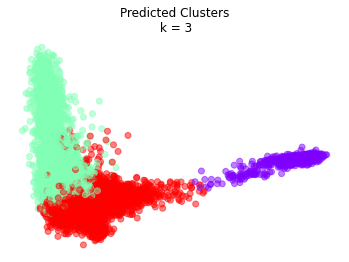

In [ ]:
# Generanos num_clusters colores equiespaciados en el espacio de colores
colors = list(plt.cm.rainbow(np.linspace(0,1, num_clusters)))

# Asociamos cada palabra a un color (vía el label de km)
colors_p = [colors[l] for l in km.labels_]

# Graficamos la data con los colores declarados
plt.scatter(reduced_PCA_data[:, 0], reduced_PCA_data[:, 1], color=colors_p, alpha = 0.5)

# Sacamos los numeritos de los ejes y el borde negro del gráfico (solo estética)
plt.xticks(())
plt.yticks(())
plt.title('Predicted Clusters\n k = {}'.format(num_clusters))
plt.gca().set_frame_on(False)

In [ ]:
terms = TFVectorizer.get_feature_names()
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
keyword_ids = list(set(order_centroids[:,:10].flatten()))
words = [terms[i] for i in keyword_ids]#Turn the ids into words.

components = PCA_pace.components_
x = components[:,keyword_ids][0,:] #Find the coordinates of those words in your biplot.
y = components[:,keyword_ids][1,:]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


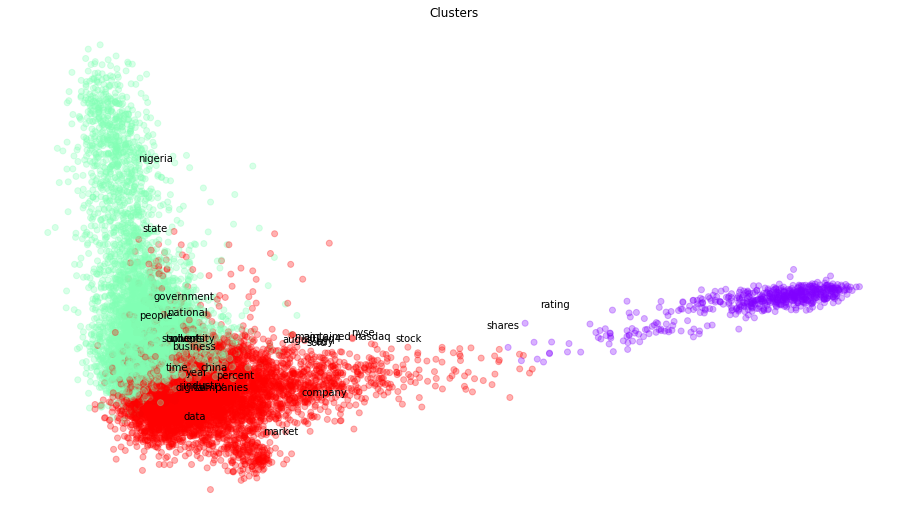

In [ ]:
fig = plt.figure(figsize = (16,9))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
ax.scatter(reduced_PCA_data[:, 0], reduced_PCA_data[:, 1], color=colors_p, alpha=0.3, label=colors_p)
for i, word in enumerate(words):
    ax.annotate(word, (x[i],y[i]))
plt.xticks(())
plt.yticks(())
plt.title('Predicted Clusters\n k = {}'.format(num_clusters))
plt.show()

In [ ]:
news_df['kmeans_predictions'] = km.labels_
news_df

,Unnamed: 0,length,date,country,publisher,body,tokenized_words,normalized_words,tokenized_sents,normalized_sents,time,length_w,length_c,kmeans_predictions
0,0,362,2001-08-17,GB,90min,reports emerged on Monday night over Barcelona...,"['Conflicting', 'reports', 'emerged', 'on', 'M...","['conflicting', 'reports', 'emerged', 'monday'...","[['reports', 'emerged', 'on', 'Monday', 'night...","[['report', 'emerge', 'monday', 'night', 'barc...",200108,362,2189,0
1,1,214,2001-08-17,GB,Telegraph.co.uk,'s value passes $800bn as it dispels fears of ...,"['Apple', ""'s"", 'value', 'passes', '$', '800bn...","['apple', 'value', 'passes', '$', '800bn', 'di...","[[""'s"", 'value', 'passes', '$', '800bn', 'as',...","[['value', 'pass', '$', '800bn', 'dispel', 'fe...",200108,214,1255,0
2,2,654,2001-08-17,GB,EuropeanCEO,"digitalisation enters new territories , EU por...","['As', 'digitalisation', 'enters', 'new', 'ter...","['digitalisation', 'enters', 'new', 'territori...","[['digitalisation', 'enters', 'new', 'territor...","[['digitalisation', 'enter', 'new', 'territory...",200108,654,4343,0
3,3,2320,2001-08-17,GB,Express.co.uk,traders are on a knife-edge after the cryptocu...,"['BITCOIN', 'traders', 'are', 'on', 'a', 'knif...","['bitcoin', 'traders', 'knife', 'edge', 'crypt...","[['traders', 'are', 'on', 'a', 'knife', 'edge'...","[['trader', 'knife', 'edge', 'cryptocurrency',...",200108,2320,14034,0
4,4,417,2001-08-17,GB,Heat,"website uses cookies . We use technologies , s...","['This', 'website', 'uses', 'cookies', 'We', '...","['website', 'uses', 'cookies', 'use', 'technol...","[['website', 'uses', 'cookies'], ['We', 'use',...","[['website', 'use', 'cooky'], ['use', 'technol...",200108,417,2331,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17551,17551,1006,2014-01-19,JM,"Government of Jamaica, Jamaica Information Ser...",Farmworker Wants to Take Care of His Family JI...,"['Rookie', 'Farmworker', 'Wants', 'to', 'Take'...","['rookie', 'farmworker', 'wants', 'care', 'fam...","[['Farmworker', 'Wants', 'to', 'Take', 'Care',...","[['farmworker', 'want', 'care', 'family', 'jis...",201401,1006,5851,0
17552,17552,221,2016-01-19,JM,Loop News Jamaica,"When we first started , we got jobs simple job...","['When', 'we', 'first', 'started', 'we', 'got'...","['started', 'got', 'jobs', 'simple', 'jobs', '...","[['When', 'we', 'first', 'started', 'we', 'got...","[['start', 'get', 'job', 'simple', 'job', 'lik...",201601,221,1299,0
17553,17553,580,2016-01-19,JM,"Government of Jamaica, Jamaica Information Ser...",Highlights The Government is to table a Bill e...,"['Story', 'Highlights', 'The', 'Government', '...","['story', 'highlights', 'government', 'table',...","[['Highlights'], ['The', 'Government', 'is', '...","[['highlight'], ['government', 'table', 'bill'...",201601,580,3571,0
17554,17554,773,2016-01-19,JM,"Government of Jamaica, Jamaica Information Ser...",Ministry Launches New eLibrary Project Educati...,"['Education', 'Ministry', 'Launches', 'New', '...","['education', 'ministry', 'launches', 'new', '...","[['Ministry', 'Launches', 'New', 'eLibrary', '...","[['ministry', 'launch', 'new', 'elibrary', 'pr...",201601,773,4886,0


## Plot Silhouette

In [ ]:
def plotSilhouette(n_clusters, X):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (15,5))
    
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = sklearn.cluster.KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    
    silhouette_avg = sklearn.metrics.silhouette_score(X, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = sklearn.metrics.silhouette_samples(X, cluster_labels)

    y_lower = 10
    
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = matplotlib.cm.get_cmap("nipy_spectral")
        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10
    
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    cmap = matplotlib.cm.get_cmap("nipy_spectral")
    colors = cmap(float(i) / n_clusters)
    ax2.scatter(reduced_PCA_data[:, 0], reduced_PCA_data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    projected_centers = PCA_pace.transform(centers)
    # Draw white circles at cluster centers
    ax2.scatter(projected_centers[:, 0], projected_centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(projected_centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("PC 1")
    ax2.set_ylabel("PC 2")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()
    print("For n_clusters = {}, The average silhouette_score is : {:.3f}".format(n_clusters, silhouette_avg))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


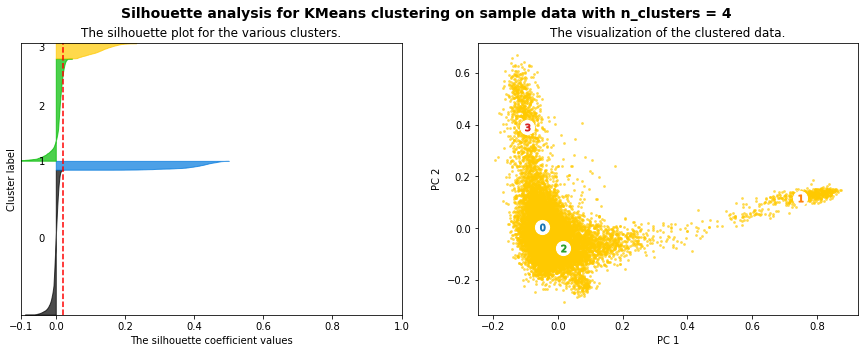

For n_clusters = 4, The average silhouette_score is : 0.021


In [ ]:
X = TFVects.toarray()
plotSilhouette(4, X)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


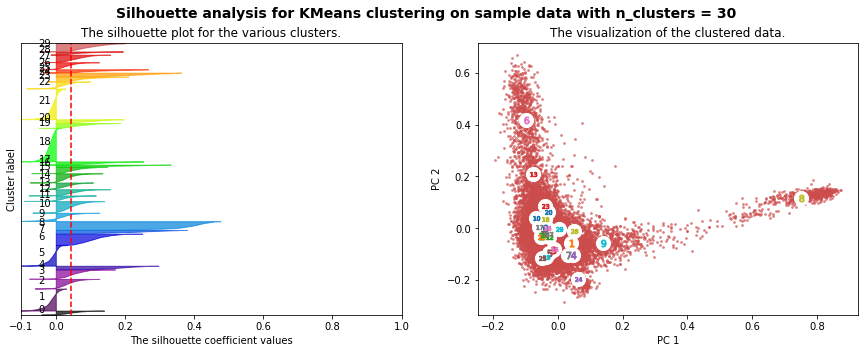

For n_clusters = 30, The average silhouette_score is : 0.045


In [ ]:
X = TFVects.toarray()
plotSilhouette(30, X)

## Hierarchical Clustering with Wald's Method

In [ ]:
#news_df_reduced = news_df_reduced.sort_index(ascending=False)
#news_df_reduced

In [ ]:
TFVects

<7052x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 728710 stored elements in Compressed Sparse Row format>

In [ ]:
news_cooc_mat = TFVects * TFVects.T
news_cooc_mat.setdiag(0)

In [ ]:
select_indices = []
index_to_cat = []
for c in set(news_df_reduced['body']):
    select_indices += list(news_df_reduced[news_df_reduced['body'] == c].index)[:50]
    index_to_cat += [c] * 50
    #.groupby('category').sum()

In [ ]:
CoocMat = TFVects * TFVects.T
CoocMat.setdiag(0)

In [ ]:
subCoocMat = CoocMat[select_indices,:][:,select_indices]

In [ ]:
linkage_matrix = scipy.cluster.hierarchy.ward(subCoocMat.toarray())
linkage_matrix[:10]

/usr/local/lib/python3.7/dist-packages/scipy/cluster/hierarchy.py:830: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


array([[2.01600000e+03, 4.16400000e+03, 1.41421356e+00, 2.00000000e+00],
       [3.35800000e+03, 5.55700000e+03, 1.41421356e+00, 2.00000000e+00],
       [1.43500000e+03, 5.89000000e+03, 1.41421356e+00, 2.00000000e+00],
       [4.09900000e+03, 6.78700000e+03, 1.41421356e+00, 2.00000000e+00],
       [3.67000000e+03, 4.20200000e+03, 1.41421356e+00, 2.00000000e+00],
       [2.55000000e+02, 7.32000000e+02, 1.41421356e+00, 2.00000000e+00],
       [4.02700000e+03, 7.05700000e+03, 1.41421356e+00, 3.00000000e+00],
       [4.41400000e+03, 7.05800000e+03, 1.41421356e+00, 4.00000000e+00],
       [5.36100000e+03, 5.61000000e+03, 1.41642680e+00, 2.00000000e+00],
       [3.16600000e+03, 6.69800000e+03, 1.43280085e+00, 2.00000000e+00]])

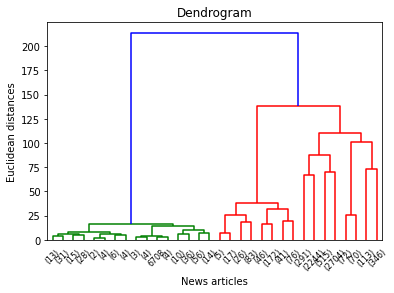

In [ ]:
dendrogramDat = scipy.cluster.hierarchy.dendrogram(linkage_matrix, p=4, truncate_mode='level', get_leaves=True)
plt.title('Dendrogram')
plt.xlabel('News articles')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
hierarchical_clusters = scipy.cluster.hierarchy.fcluster(linkage_matrix, 3, 'maxclust')
hierarchical_clusters

array([3, 3, 3, ..., 3, 3, 3], dtype=int32)

In [ ]:
linkage_matrix_full = scipy.cluster.hierarchy.ward(news_cooc_mat.toarray())
hierarchical_clusters_full = scipy.cluster.hierarchy.fcluster(linkage_matrix_full, 3, 'maxclust')
print("For our complete clusters:")
print("Homogeneity: {:0.3f}".format(sklearn.metrics.homogeneity_score(news_df_reduced['body'], hierarchical_clusters_full)))
print("Completeness: {:0.3f}".format(sklearn.metrics.completeness_score(news_df_reduced['body'], hierarchical_clusters_full)))
print("V-measure: {:0.3f}".format(sklearn.metrics.v_measure_score(news_df_reduced['body'], hierarchical_clusters_full)))
print("Adjusted Rand Score: {:0.3f}".format(sklearn.metrics.adjusted_rand_score(news_df_reduced['body'], hierarchical_clusters_full)))

/usr/local/lib/python3.7/dist-packages/scipy/cluster/hierarchy.py:830: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


For our complete clusters:
Homogeneity: 0.043
Completeness: 0.999
V-measure: 0.083
Adjusted Rand Score: 0.000


In [ ]:
news_df_reduced['ward_predictions'] = hierarchical_clusters_full
news_df_reduced

,index,length,date,country,url,body,tokenized_words,normalized_words,kmeans_predictions,ward_predictions
0,17555,610,2017-01-19,JM,http://www.loopjamaica.com/content/asteroids-a...,Asteroids are smacking Earth twice as often as...,"['Asteroids', 'are', 'smacking', 'Earth', 'twi...","['asteroids', 'smacking', 'earth', 'twice', 'd...",2,3
1,17554,773,2016-01-19,JM,https://jis.gov.jm/education-ministry-launches...,Education Ministry Launches New eLibrary Proje...,"['Education', 'Ministry', 'Launches', 'New', '...","['education', 'ministry', 'launches', 'new', '...",2,3
2,17553,580,2016-01-19,JM,https://jis.gov.jm/bill-to-acquire-pdv-caribe-...,Story Highlights The Government is to table a ...,"['Story', 'Highlights', 'The', 'Government', '...","['story', 'highlights', 'government', 'table',...",2,3
3,17551,1006,2014-01-19,JM,https://jis.gov.jm/features/rookie-farmworker-...,Rookie Farmworker Wants to Take Care of His Fa...,"['Rookie', 'Farmworker', 'Wants', 'to', 'Take'...","['rookie', 'farmworker', 'wants', 'care', 'fam...",2,3
4,17549,555,2011-01-19,JM,https://jis.gov.jm/mining-minister-highlights-...,Story Highlights Minister of Transport and Min...,"['Story', 'Highlights', 'Minister', 'of', 'Tra...","['story', 'highlights', 'minister', 'transport...",2,3
...,...,...,...,...,...,...,...,...,...,...
7047,22,665,2001-08-17,GB,http://www.cityam.com/269542/avoid-paying-loya...,It 's very common to switch mobile phone provi...,"['It', ""'s"", 'very', 'common', 'to', 'switch',...","['common', 'switch', 'mobile', 'phone', 'provi...",2,3
7048,21,928,2001-08-17,GB,http://citywire.co.uk/new-model-adviser/news/w...,Top stories The Times : Shares in the world 's...,"['Top', 'stories', 'The', 'Times', 'Shares', '...","['stories', 'times', 'shares', 'world', 'large...",2,3
7049,17,594,2001-08-17,GB,http://www.independent.co.uk/news/business/new...,ASIC said that it was encouraged by the speed ...,"['ASIC', 'said', 'that', 'it', 'was', 'encoura...","['asic', 'said', 'encouraged', 'speed', 'apple...",2,3
7050,15,547,2001-08-17,GB,http://bristol.ac.uk/news/2017/august/longitud...,University of Bristol team develop a new test ...,"['University', 'of', 'Bristol', 'team', 'devel...","['university', 'bristol', 'team', 'develop', '...",2,3


Ward method is actually a method that tries to minimize the variance within each cluster. In K-means when we were trying to minimize the wcss to plot our elbow method chart, here it’s almost the same the only difference is that instead of minimizing wcss we are minimizing the within-cluster variants. That is the variance within each cluster.

## Gensim - Latent Dirichlet Allocation (LDA)

In [ ]:
import spacy
nlp = spacy.load("en")

In [ ]:
news_df_reduced

,Unnamed: 0,length,date,country,publisher,body,tokenized_words,normalized_words,tokenized_sents,normalized_sents,body_clean
0,0,362,2001-08-17,GB,90min,reports emerged on Monday night over Barcelona...,"[reports, emerged, on, monday, night, over, ba...","['conflicting', 'reports', 'emerged', 'monday'...","[[reports, emerged, on, monday, night, over, b...","[['report', 'emerge', 'monday', 'night', 'barc...",reports emerged on monday night over barcelona...
1,1,214,2001-08-17,GB,Telegraph.co.uk,'s value passes $800bn as it dispels fears of ...,"['s, value, passes, $, 800bn, as, it, dispels,...","['apple', 'value', 'passes', '$', '800bn', 'di...","[['s, value, passes, $, 800bn, as, it, dispels...","[['value', 'pass', '$', '800bn', 'dispel', 'fe...",s value passes 800bn as it dispels fears of ip...
4,4,417,2001-08-17,GB,Heat,"website uses cookies . We use technologies , s...","[website, uses, cookies, ., we, use, technolog...","['website', 'uses', 'cookies', 'use', 'technol...","[[website, uses, cookies, .], [we, use, techno...","[['website', 'use', 'cooky'], ['use', 'technol...",website uses cookies we use technologies suc...
6,6,219,2001-08-17,GB,Empire,"website uses cookies . We use technologies , s...","[website, uses, cookies, ., we, use, technolog...","['website', 'uses', 'cookies', 'use', 'technol...","[[website, uses, cookies, .], [we, use, techno...","[['website', 'use', 'cooky'], ['use', 'technol...",website uses cookies we use technologies suc...
7,7,243,2001-08-17,GB,Press Release Rocket (press release),"1994 , Zymo Research has provided reliable , i...","[1994, ,, zymo, research, has, provided, relia...","['zymo', 'research', 'provided', 'reliable', '...","[[1994, ,, zymo, research, has, provided, reli...","[['zymo', 'research', 'provide', 'reliable', '...",1994 zymo research has provided reliable inn...
...,...,...,...,...,...,...,...,...,...,...,...
17549,17549,555,2011-01-19,JM,"Government of Jamaica, Jamaica Information Ser...","Highlights Minister of Transport and Mining , ...","[highlights, minister, of, transport, and, min...","['story', 'highlights', 'minister', 'transport...","[[highlights, minister, of, transport, and, mi...","[['highlight', 'minister', 'transport', 'mine'...",highlights minister of transport and mining h...
17550,17550,448,2011-01-19,JM,Loop News Jamaica,tells HEART Trust to intensify training of BPO...,"[tells, heart, trust, to, intensify, training,...","['holness', 'tells', 'heart', 'trust', 'intens...","[[tells, heart, trust, to, intensify, training...","[['tell', 'heart', 'trust', 'intensify', 'trai...",tells heart trust to intensify training of bpo...
17552,17552,221,2016-01-19,JM,Loop News Jamaica,"When we first started , we got jobs simple job...","[when, we, first, started, ,, we, got, jobs, s...","['started', 'got', 'jobs', 'simple', 'jobs', '...","[[when, we, first, started, ,, we, got, jobs, ...","[['start', 'get', 'job', 'simple', 'job', 'lik...",when we first started we got jobs simple jobs...
17553,17553,580,2016-01-19,JM,"Government of Jamaica, Jamaica Information Ser...",Highlights The Government is to table a Bill e...,"[highlights, the, government, is, to, table, a...","['story', 'highlights', 'government', 'table',...","[[highlights, the, government, is, to, table, ...","[['highlight'], ['government', 'table', 'bill'...",highlights the government is to table a bill e...


In [ ]:
def dropMissing(wordLst, vocab):
    return [w for w in wordLst if w in vocab]

news_df_reduced['reduced_tokens'] = news_df_reduced['tokenized_words'].apply(lambda x: dropMissing(x, TFVectorizer.vocabulary_.keys()))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
dictionary = gensim.corpora.Dictionary(news_df_reduced['reduced_tokens'])
corpus = [dictionary.doc2bow(text) for text in news_df_reduced['reduced_tokens']]

In [ ]:
gensim.corpora.MmCorpus.serialize('news.mm', corpus)
senmm = gensim.corpora.MmCorpus('news.mm')

In [ ]:
senlda = gensim.models.ldamodel.LdaModel(corpus=senmm, id2word=dictionary, num_topics=10, alpha='auto', eta='auto')

In [ ]:
sen1Bow = dictionary.doc2bow(news_df_reduced['reduced_tokens'][0])
sen1lda = senlda[sen1Bow]
print("The topics of the text: {}".format(news_df_reduced['body'][1530]))
print("are: {}".format(sen1lda))

The topics of the text: , Daraz.pk salute nation with discounts up to 70pc This Independence Day , HBL and Daraz.pk have come together to bring their customers the biggest online shopping event of the year -- HBL Independence Day ShopFest on August 13 and 14 . The Azadi celebration will offer discounts up to 70% , to celebrate 70 years of independence . Additional discounts will be available to all HBL credit and debit cardholders . Join HBL and Daraz in the country 's 70th Independence Day Celebrations , as they continue to restlessly pursue the question : What is next ? For it is on the cutting edge of technology and digital culture and the power of connectivity to bring people together- that they find their purpose . Speaking on this occasion , Mr. AamirKureshi , Head Global Consumer Banking , HBL said , " We are continuously exploring new ways of offering our customers a rewarding card experience and our partnership with Daraz is a step towards promoting e-commerce card usage in Pa

In [ ]:
lda_df = pandas.DataFrame({
        'body' : news_df_reduced['body'],
        'topics' : [senlda[dictionary.doc2bow(l)] for l in news_df_reduced['reduced_tokens']]
    })

In [ ]:
lda_df

,body,topics
0,reports emerged on Monday night over Barcelona...,"[(4, 0.63436556), (8, 0.3542247)]"
1,'s value passes $800bn as it dispels fears of ...,"[(3, 0.37048867), (4, 0.46351698), (8, 0.15596..."
4,"website uses cookies . We use technologies , s...","[(4, 0.9645532), (7, 0.0300548)]"
6,"website uses cookies . We use technologies , s...","[(4, 0.98521817)]"
7,"1994 , Zymo Research has provided reliable , i...","[(7, 0.9894628)]"
...,...,...
17549,"Highlights Minister of Transport and Mining , ...","[(7, 0.9963368)]"
17550,tells HEART Trust to intensify training of BPO...,"[(7, 0.9943749)]"
17552,"When we first started , we got jobs simple job...","[(4, 0.30290258), (7, 0.68904877)]"
17553,Highlights The Government is to table a Bill e...,"[(6, 0.043628544), (7, 0.68400615), (9, 0.2684..."


In [ ]:
#Dict to temporally hold the probabilities
topicsProbDict = {i : [0] * len(lda_df) for i in range(senlda.num_topics)}

#Load them into the dict
for index, topicTuples in enumerate(lda_df['topics']):
    for topicNum, prob in topicTuples:
        topicsProbDict[topicNum][index] = prob

#Update the DataFrame
for topicNum in range(senlda.num_topics):
    lda_df['topic_{}'.format(topicNum)] = topicsProbDict[topicNum]

lda_df[1::100]

,body,topics,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
1,'s value passes $800bn as it dispels fears of ...,"[(3, 0.37048867), (4, 0.46351698), (8, 0.15596...",0.000000,0.0,0.000000,0.370489,0.463517,0.000000,0.000000,0.000000,0.155969,0.000000
183,Impact of South American &amp; European Stars ...,"[(3, 0.4381335), (4, 0.22743642), (6, 0.3300654)]",0.000000,0.0,0.000000,0.438134,0.227436,0.000000,0.330065,0.000000,0.000000,0.000000
356,in the form to get 5 articles for FREE ! Iden...,"[(3, 0.1884087), (4, 0.10633282), (7, 0.242857...",0.000000,0.0,0.000000,0.188409,0.106333,0.000000,0.000000,0.242857,0.459531,0.000000
520,Business Machines Corporation ( NYSE:IBM ) las...,"[(0, 0.6889281), (9, 0.30734077)]",0.688928,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.307341
687,", that was quick . Less than 200 days since th...","[(4, 0.8811282), (6, 0.07249575), (7, 0.0417206)]",0.000000,0.0,0.000000,0.000000,0.881128,0.000000,0.072496,0.041721,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
16886,professionals in the digital era need to devel...,"[(2, 0.103987895), (7, 0.8920212)]",0.000000,0.0,0.103988,0.000000,0.000000,0.000000,0.000000,0.892021,0.000000,0.000000
17034,"December 2018 , Nike dropped the black variant...","[(4, 0.1698959), (8, 0.8142253)]",0.000000,0.0,0.000000,0.000000,0.169896,0.000000,0.000000,0.000000,0.814225,0.000000
17187,Companies to first deliver medium pickup truck...,"[(3, 0.05402171), (7, 0.17945082), (8, 0.76333...",0.000000,0.0,0.000000,0.054022,0.000000,0.000000,0.000000,0.179451,0.763337,0.000000
17339,confirms platinum sponsorship of DevConf ZA 20...,"[(2, 0.106390335), (5, 0.19946451), (7, 0.6900...",0.000000,0.0,0.106390,0.000000,0.000000,0.199465,0.000000,0.690085,0.000000,0.000000


In [ ]:
ldaDFV = lda_df[:10][['topic_%d' %x for x in range(10)]]
ldaDFVisN = lda_df[:10][['body']]
ldaDFVis = ldaDFV.to_numpy()
ldaDFVisNames = ldaDFVisN.to_numpy()
ldaDFV

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
0,0.0,0.0,0.000000,0.000000,0.634366,0.0,0.000000,0.000000,0.354225,0.000000
1,0.0,0.0,0.000000,0.370489,0.463517,0.0,0.000000,0.000000,0.155969,0.000000
4,0.0,0.0,0.000000,0.000000,0.964553,0.0,0.000000,0.030055,0.000000,0.000000
6,0.0,0.0,0.000000,0.000000,0.985218,0.0,0.000000,0.000000,0.000000,0.000000
7,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.989463,0.000000,0.000000
8,0.0,0.0,0.138421,0.315119,0.036086,0.0,0.150887,0.094835,0.000000,0.263134
10,0.0,0.0,0.000000,0.000000,0.462378,0.0,0.329762,0.000000,0.195053,0.000000
12,0.0,0.0,0.078487,0.000000,0.000000,0.0,0.000000,0.628595,0.288116,0.000000
13,0.0,0.0,0.000000,0.000000,0.194429,0.0,0.000000,0.747678,0.000000,0.053851
14,0.0,0.0,0.739684,0.000000,0.000000,0.0,0.000000,0.253477,0.000000,0.000000


ValueError: ignored

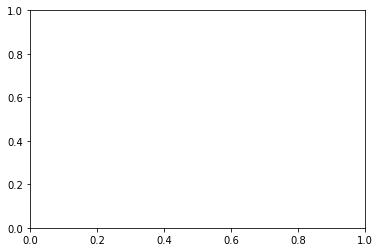

In [ ]:
N = 10
ind = np.arange(N)
K = senlda.num_topics  # N documents, K topics
ind = np.arange(N)  # the x-axis locations for the novels
width = 0.5  # the width of the bars
plots = []
height_cumulative = np.zeros(N)

for k in range(K):
    color = plt.cm.coolwarm(k/K, 1)
    if k == 0:
        p = plt.bar(ind, ldaDFVis[:, k], width, color=color)
    else:
        p = plt.bar(ind, ldaDFVis[:, k], width, bottom=height_cumulative, color=color)
    height_cumulative += ldaDFVis[:, k]
    plots.append(p)
    

plt.ylim((0, 1))  # proportions sum to 1, so the height of the stacked bars is 1
plt.ylabel('Topics')

plt.title('Topics in News about technology')
plt.xticks(ind+width/2, ldaDFVisNames, rotation='vertical')

plt.yticks(np.arange(0, 1, 10))
topic_labels = ['Topic #{}'.format(k) for k in range(K)]
plt.legend([p[0] for p in plots], topic_labels, loc='center left', frameon=True,  bbox_to_anchor = (1, .5))

plt.show()

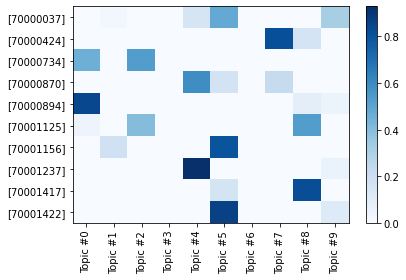

In [ ]:
plt.pcolor(ldaDFVis, norm=None, cmap='Blues')
plt.yticks(np.arange(ldaDFVis.shape[0])+0.5, ldaDFVisNames);
plt.xticks(np.arange(ldaDFVis.shape[1])+0.5, topic_labels);

# flip the y-axis so the texts are in the order we anticipate (Austen first, then Brontë)
plt.gca().invert_yaxis()

# rotate the ticks on the x-axis
plt.xticks(rotation=90)

# add a legend
plt.colorbar(cmap='Blues')
plt.tight_layout()  # fixes margins
plt.show()

In [ ]:
senlda.show_topic(5)

[('data', 0.09945584),
 ('amazon', 0.026041612),
 ('company', 0.021179833),
 ('digital', 0.017205933),
 ('cloud', 0.012262304),
 ('privacy', 0.009925205),
 ('revenue', 0.009659968),
 ('services', 0.008239578),
 ('technologies', 0.008184459),
 ('customers', 0.008106742)]

In [ ]:
topics_dict = {}
for topicNum in range(senlda.num_topics):
    topic_words = [w for w, p in senlda.show_topic(topicNum)]
    topics_dict['Topic_{}'.format(topicNum)] = topic_words

word_ranks_df = pandas.DataFrame(topics_dict)
word_ranks_df

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9
0,million,schools,security,market,use,data,china,business,company,company
1,shares,medical,use,report,privacy,amazon,percent,government,energy,shares
2,thursday,crore,traffic,global,media,company,trade,state,power,firm
3,company,january,2019,cent,south,digital,chinese,africa,electric,group
4,rating,school,provide,growth,social,cloud,billion,development,vehicle,stock
5,june,million,customers,south,time,privacy,trump,country,year,securities
6,tuesday,shares,service,india,features,revenue,tariffs,minister,car,million
7,worth,health,services,industry,content,services,companies,work,2019,share
8,stock,board,company,company,click,technologies,company,university,vehicles,exchange
9,billion,december,information,rs,web,customers,earnings,people,million,amp


## Dynamic Topic Modelling

In [ ]:
news_df_reduced['date'].value_counts()

In [ ]:
news_years = {}

In [ ]:
import collections

In [ ]:
date = []
date_lens = []

# Word Embeddings

In [ ]:
news_df_reduced['tokenized_sents']

0        [reports emerged on monday night over barcelon...
1        [s value passes 800bn as it dispels fears of i...
2        [website uses cookies  we use technologies  su...
3        [website uses cookies  we use technologies  su...
4        [1994  zymo research has provided reliable  in...
                               ...                        
10127    [highlights minister of transport and mining  ...
10128    [tells heart trust to intensify training of bp...
10129    [when we first started  we got jobs simple job...
10130    [highlights the government is to table a bill ...
10131    [are smacking earth twice as often as before t...
Name: tokenized_sents, Length: 10132, dtype: object

In [ ]:
news_df_reduced

,level_0,index,country,publisher,body,tokenized_words,normalized_words,tokenized_sents,normalized_sents,time,length_w,length_c,kmeans_predictions,body_clean
0,0,0,GB,90min,reports emerged on Monday night over Barcelona...,"[reports, emerged, on, monday, night, over, ba...","['conflicting', 'reports', 'emerged', 'monday'...",[reports emerged on monday night over barcelon...,"[['report', 'emerge', 'monday', 'night', 'barc...",200108,362,2189,0,reports emerged on monday night over barcelona...
1,1,1,GB,Telegraph.co.uk,'s value passes $800bn as it dispels fears of ...,"[s, value, passes, 800bn, as, it, dispels, fea...","['apple', 'value', 'passes', '$', '800bn', 'di...",[s value passes 800bn as it dispels fears of i...,"[['value', 'pass', '$', '800bn', 'dispel', 'fe...",200108,214,1255,0,s value passes 800bn as it dispels fears of ip...
2,2,4,GB,Heat,"website uses cookies . We use technologies , s...","[website, uses, cookies, we, use, technologies...","['website', 'uses', 'cookies', 'use', 'technol...",[website uses cookies we use technologies su...,"[['website', 'use', 'cooky'], ['use', 'technol...",200108,417,2331,0,website uses cookies we use technologies suc...
3,3,6,GB,Empire,"website uses cookies . We use technologies , s...","[website, uses, cookies, we, use, technologies...","['website', 'uses', 'cookies', 'use', 'technol...",[website uses cookies we use technologies su...,"[['website', 'use', 'cooky'], ['use', 'technol...",200108,219,1296,0,website uses cookies we use technologies suc...
4,4,7,GB,Press Release Rocket (press release),"1994 , Zymo Research has provided reliable , i...","[1994, zymo, research, has, provided, reliable...","['zymo', 'research', 'provided', 'reliable', '...",[1994 zymo research has provided reliable in...,"[['zymo', 'research', 'provide', 'reliable', '...",200108,243,1550,0,1994 zymo research has provided reliable inn...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10127,10127,17549,JM,"Government of Jamaica, Jamaica Information Ser...","Highlights Minister of Transport and Mining , ...","[highlights, minister, of, transport, and, min...","['story', 'highlights', 'minister', 'transport...",[highlights minister of transport and mining ...,"[['highlight', 'minister', 'transport', 'mine'...",201101,555,3655,0,highlights minister of transport and mining h...
10128,10128,17550,JM,Loop News Jamaica,tells HEART Trust to intensify training of BPO...,"[tells, heart, trust, to, intensify, training,...","['holness', 'tells', 'heart', 'trust', 'intens...",[tells heart trust to intensify training of bp...,"[['tell', 'heart', 'trust', 'intensify', 'trai...",201101,448,2554,0,tells heart trust to intensify training of bpo...
10129,10129,17552,JM,Loop News Jamaica,"When we first started , we got jobs simple job...","[when, we, first, started, we, got, jobs, simp...","['started', 'got', 'jobs', 'simple', 'jobs', '...",[when we first started we got jobs simple job...,"[['start', 'get', 'job', 'simple', 'job', 'lik...",201601,221,1299,0,when we first started we got jobs simple jobs...
10130,10130,17553,JM,"Government of Jamaica, Jamaica Information Ser...",Highlights The Government is to table a Bill e...,"[highlights, the, government, is, to, table, a...","['story', 'highlights', 'government', 'table',...",[highlights the government is to table a bill ...,"[['highlight'], ['government', 'table', 'bill'...",201601,580,3571,0,highlights the government is to table a bill e...


In [ ]:
news_df_reduced_to_body  = news_df_reduced.drop(news_df_reduced.columns[:12], axis=1)
news_df_reduced_to_body

,body_clean
0,reports emerged on monday night over barcelona...
1,s value passes 800bn as it dispels fears of ip...
2,website uses cookies we use technologies suc...
3,website uses cookies we use technologies suc...
4,1994 zymo research has provided reliable inn...
...,...
10127,highlights minister of transport and mining h...
10128,tells heart trust to intensify training of bpo...
10129,when we first started we got jobs simple jobs...
10130,highlights the government is to table a bill e...


In [ ]:
print(type(news_df_reduced_to_body['body_clean']))

<class 'pandas.core.series.Series'>


In [ ]:
news_df_reduced_to_body.body_clean.apply(str)

0        reports emerged on monday night over barcelona...
1        s value passes 800bn as it dispels fears of ip...
2        website uses cookies  we use technologies  suc...
3        website uses cookies  we use technologies  suc...
4        1994  zymo research has provided reliable  inn...
                               ...                        
10127    highlights minister of transport and mining  h...
10128    tells heart trust to intensify training of bpo...
10129    when we first started  we got jobs simple jobs...
10130    highlights the government is to table a bill e...
10131    are smacking earth twice as often as before th...
Name: body_clean, Length: 10132, dtype: object

In [ ]:
news_df_reduced_to_body.to_csv('news_body.csv', header=None, index=None, sep=' ', mode='a')

## Word2Vec

In [ ]:
# The sg=0 argument indicates that we don't want to use "skipgram" but instead "CBOW"
#trained with 10% of the dataset
news_W2V = gensim.models.word2vec.Word2Vec(news_df_reduced['tokenized_sents'].sum(), sg=0, size=100, hs=1, negative=0)

In [ ]:
#news_W2V = gensim.models.word2vec.Word2Vec(news_df_r10['tokenized_sents'].sum(), sg=0, size=100, hs=1, negative=0)

In [ ]:
news_W2V.wv.syn0.shape #(37, 100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  """Entry point for launching an IPython kernel.


(30630, 100)

In [ ]:
news_W2V.wv.index2word[0]

'the'

In [ ]:
news_W2V.most_similar('technology')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('technologies', 0.6997628211975098),
 ('tech', 0.6056568622589111),
 ('fiction', 0.514491081237793),
 ('software', 0.49589237570762634),
 ('technological', 0.49509376287460327),
 ('capabilities', 0.49342676997184753),
 ('techniques', 0.4867194592952728),
 ('system', 0.4610312581062317),
 ('breakthroughs', 0.4534061551094055),
 ('architecture', 0.436485230922699)]

In [ ]:
news_W2V.most_similar('future')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('electrification', 0.47503387928009033),
 ('workplace', 0.46243810653686523),
 ('prospects', 0.4486740231513977),
 ('growth', 0.4443446397781372),
 ('opportunities', 0.4409978985786438),
 ('new', 0.44045066833496094),
 ('economy', 0.41848087310791016),
 ('prosperous', 0.41303014755249023),
 ('possibilities', 0.41228002309799194),
 ('grow', 0.4089204668998718)]

In [ ]:
news_W2V.most_similar('danger')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('-ism', 0.5415027141571045),
 ('fear', 0.49197691679000854),
 ('snatch', 0.4810393452644348),
 ('illness', 0.45821693539619446),
 ('damaging', 0.43662235140800476),
 ('deviation', 0.43361082673072815),
 ('towel', 0.4274551570415497),
 ('anxiety', 0.42688608169555664),
 ('provocative', 0.4265364408493042),
 ('depression', 0.4184872806072235)]

In [ ]:
news_W2V.most_similar('facebook')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('google', 0.5817946195602417),
 ('emails', 0.551323652267456),
 ('netflix', 0.5403193235397339),
 ('twitter', 0.5280470848083496),
 ('youtube', 0.5080283880233765),
 ('instagram', 0.4906217157840729),
 ('alphabet', 0.4854714572429657),
 ('snapchat', 0.47319746017456055),
 ('whatsapp', 0.4618702530860901),
 ('itunes', 0.4482214152812958)]

In [ ]:
news_W2V.most_similar('amazon')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('google', 0.6696304082870483),
 ('netflix', 0.6226637959480286),
 ('apple', 0.6026298999786377),
 ('siri', 0.5639740228652954),
 ('tencent', 0.5451704263687134),
 ('alexa', 0.5283421277999878),
 ('microsoft', 0.5123767256736755),
 ('e-commerce', 0.5046437978744507),
 ('spotify', 0.5003300309181213),
 ('tesla', 0.498535692691803)]

In [ ]:
news_W2V.most_similar('privacy')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('formulation', 0.40283748507499695),
 ('detail', 0.3970189392566681),
 ('slavery', 0.3940558135509491),
 ('values', 0.3910941481590271),
 ('penalties', 0.373348593711853),
 ('ethnicity', 0.3729918897151947),
 ('nite', 0.3702724277973175),
 ('real-world', 0.36507412791252136),
 ('obscura', 0.3606213331222534),
 ('norms', 0.360164999961853)]

In [ ]:
news_W2V.most_similar('fake')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('bogus', 0.6197618246078491),
 ('abp', 0.5488803386688232),
 ('false', 0.5271909832954407),
 ('related', 0.5252624750137329),
 ('trick', 0.4690677225589752),
 ('illegal', 0.46719875931739807),
 ('abs-cbn', 0.46236923336982727),
 ('criminal', 0.4572892189025879),
 ('bad', 0.45650985836982727),
 ('confidential', 0.4531785249710083)]

In [ ]:
news_W2V.save("news_word_2_Vec")

In [ ]:
numWords = 100
targetwords = news_W2V.wv.index2word[:numWords]

In [ ]:
words_sub_matrix = []
for word in targetwords:
    words_sub_matrix.append(news_W2V[word])
words_sub_matrix = np.array(words_sub_matrix)
words_sub_matrix

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


array([[-0.02851146, -0.09662829, -0.249812  , ...,  0.12800367,
        -0.41427022,  0.37432203],
       [-0.04210491, -0.2815064 ,  0.13313441, ...,  0.11402573,
         0.19260937,  0.05055967],
       [ 0.6160812 , -0.34297886,  0.18602115, ...,  0.54693675,
        -0.07889436, -0.12369872],
       ...,
       [-0.66716707,  0.47528455, -1.2873353 , ..., -0.4584224 ,
        -0.54841405, -0.7917391 ],
       [-0.07177911,  0.05989902, -0.24025898, ..., -1.5481133 ,
        -0.29675755, -0.09997096],
       [ 0.32439813, -0.33786976, -0.972515  , ..., -1.9750465 ,
        -0.6881157 ,  1.3420944 ]], dtype=float32)

In [ ]:
pca_words = sklearn.decomposition.PCA(n_components = 20).fit(words_sub_matrix)
reducedPCA_data = pca_words.transform(words_sub_matrix)
tsneWords = sklearn.manifold.TSNE(n_components = 2).fit_transform(reducedPCA_data)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


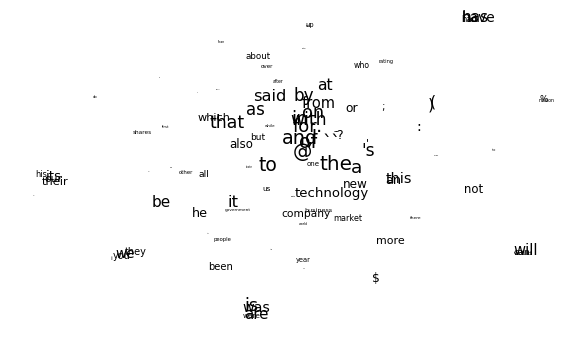

In [ ]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWords[:, 0], tsneWords[:, 1], alpha = 0)#Making the points invisible 
for i, word in enumerate(targetwords):
    ax.annotate(word, (tsneWords[i, 0],tsneWords[i, 1]), size =  20 * (numWords - i) / numWords)
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
word = u'technology' 
ss = news_W2V.similar_by_word(word,topn=10)
print("the most similar words to " + word + " is: ")
for s in ss:
    print(s[0])
print("")

the most similar words to technology is: 
technologies
tech
fiction
software
technological
capabilities
techniques
system
breakthroughs
architecture



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  


In [ ]:
word = u'future' 
ss = news_W2V.similar_by_word(word,topn=10)
print("the most similar words to " + word + " is: ")
for s in ss:
    print(s[0])
print("")

the most similar words to future is: 
electrification
workplace
prospects
growth
opportunities
new
economy
prosperous
possibilities
grow



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  


In [ ]:
word = u'innovation' 
ss = news_W2V.similar_by_word(word,topn=10)
print("the most similar words to " + word + " is: ")
for s in ss:
    print(s[0])
print("")

the most similar words to innovation is: 
entrepreneurship
creativity
development
transformation
advancement
inclusive
ar/vr
entrepreneurial
collaborative
talent



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  


In [ ]:
news_W2V.most_similar(positive=['zuckerberg', 'facebook'], negative = ['twitter'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('marchionne', 0.4407764673233032),
 ('embroiled', 0.4100828766822815),
 ('zhan', 0.40519726276397705),
 ('karen', 0.3999119997024536),
 ('tripathi', 0.39797443151474),
 ('velasco', 0.3866443336009979),
 ('59.40m', 0.378347247838974),
 ('letter', 0.3762715756893158),
 ('mathew', 0.3696044683456421),
 ('moholdt', 0.3668350577354431)]

In [ ]:
# Pasar bodys a txt
texto_newsdf = str(news_df_reduced['body'].sum()) # o quizás
#texto = str(sum(df['body']))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



TypeError: ignored

In [ ]:
with open('texto_newsdf.txt') as f:
    f.write(texto_newsdf)

# Fasttext

In [ ]:
!pip install fasttext

     |████████████████████████████████| 68 kB 2.3 MB/s 
  Using cached pybind11-2.9.1-py2.py3-none-any.whl (211 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3131827 sha256=ef615adc841d9174948a0eb6c1b0e9b9a33401528f21791c956fe4716a53578f
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built fasttext


In [ ]:
import fasttext

In [ ]:
model = fasttext.train_unsupervised("news_body.csv")

In [ ]:
model.save_model("fasttext_news_model")
# model = fasttext.load_model("result/fil9.bin")

In [ ]:
model.words

In [ ]:
model.get_nearest_neighbors('technology')

[(0.9215999245643616, '"technology'),
 (0.8433616161346436, 'hightechnology'),
 (0.8378563523292542, 'antitechnology'),
 (0.8147123456001282, 'technologyfocused'),
 (0.8106054663658142, 'technologybased'),
 (0.7966344356536865, 'nanotechnology'),
 (0.7668408155441284, 'intertechnology'),
 (0.7543010115623474, 'technologyrelated'),
 (0.7478041648864746, 'technologyenabled'),
 (0.7180966138839722, 'biotechnology')]

In [ ]:
model.get_nearest_neighbors('facebook')

[(0.8634870052337646, 'facebookowned'),
 (0.7637348771095276, 'twitter'),
 (0.7022396922111511, 'googleparent'),
 (0.6936445832252502, 'instagram"'),
 (0.677923321723938, 'instagram'),
 (0.6487953066825867, 'zuckerberg'),
 (0.6472145318984985, 'facebookshare'),
 (0.6388155817985535, 'youtube'),
 (0.6329957246780396, 'google'),
 (0.632114052772522, 'infowars')]

In [ ]:
model.get_analogies("technology", "surveillance", "privacy")

[(0.6871259808540344, 'itokprivacy'),
 (0.6488043069839478, '"technology'),
 (0.6206883788108826, 'ok"'),
 (0.5910120010375977, 'cookie'),
 (0.5755129456520081, 'condutaions'),
 (0.5715880393981934, 'termands'),
 (0.5631168484687805, 'our'),
 (0.5441444516181946, 'oneindia'),
 (0.5415854454040527, 'cookies'),
 (0.53645259141922, '"website')]

## Doc2Vec

In [ ]:
keywords = ['technology', 'digital', 'information', 'product', 'smartphone', 'media', 'network', 'internet', 'platform', 'future']

In [ ]:
taggedDocs = []
for index, row in news_df_reduced.iterrows():
    docKeywords = [s for s in keywords if s in row['tokenized_words']]
    docKeywords.append(index)
    taggedDocs.append(gensim.models.doc2vec.LabeledSentence(words = row['tokenized_words'], tags = docKeywords))
news_df_reduced['taggednews'] = taggedDocs
news_df_reduced

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Unnamed: 0,length,date,country,publisher,body,tokenized_words,normalized_words,tokenized_sents,normalized_sents,body_clean,reduced_tokens,taggednews
0,0,362,2001-08-17,GB,90min,reports emerged on Monday night over Barcelona...,"[reports, emerged, on, monday, night, over, ba...","['conflicting', 'reports', 'emerged', 'monday'...","[[reports, emerged, on, monday, night, over, b...","[['report', 'emerge', 'monday', 'night', 'barc...",reports emerged on monday night over barcelona...,"[reports, monday, night, continued, seen, offe...","([reports, emerged, on, monday, night, over, b..."
1,1,214,2001-08-17,GB,Telegraph.co.uk,'s value passes $800bn as it dispels fears of ...,"['s, value, passes, $, 800bn, as, it, dispels,...","['apple', 'value', 'passes', '$', '800bn', 'di...","[['s, value, passes, $, 800bn, as, it, dispels...","[['value', 'pass', '$', '800bn', 'dispel', 'fe...",s value passes 800bn as it dispels fears of ip...,"[value, iphone, apple, value, night, company, ...","(['s, value, passes, $, 800bn, as, it, dispels..."
4,4,417,2001-08-17,GB,Heat,"website uses cookies . We use technologies , s...","[website, uses, cookies, ., we, use, technolog...","['website', 'uses', 'cookies', 'use', 'technol...","[[website, uses, cookies, .], [we, use, techno...","[['website', 'use', 'cooky'], ['use', 'technol...",website uses cookies we use technologies suc...,"[website, uses, cookies, use, technologies, co...","([website, uses, cookies, ., we, use, technolo..."
6,6,219,2001-08-17,GB,Empire,"website uses cookies . We use technologies , s...","[website, uses, cookies, ., we, use, technolog...","['website', 'uses', 'cookies', 'use', 'technol...","[[website, uses, cookies, .], [we, use, techno...","[['website', 'use', 'cooky'], ['use', 'technol...",website uses cookies we use technologies suc...,"[website, uses, cookies, use, technologies, co...","([website, uses, cookies, ., we, use, technolo..."
7,7,243,2001-08-17,GB,Press Release Rocket (press release),"1994 , Zymo Research has provided reliable , i...","[1994, ,, zymo, research, has, provided, relia...","['zymo', 'research', 'provided', 'reliable', '...","[[1994, ,, zymo, research, has, provided, reli...","[['zymo', 'research', 'provide', 'reliable', '...",1994 zymo research has provided reliable inn...,"[research, provided, innovative, high, quality...","([1994, ,, zymo, research, has, provided, reli..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17549,17549,555,2011-01-19,JM,"Government of Jamaica, Jamaica Information Ser...","Highlights Minister of Transport and Mining , ...","[highlights, minister, of, transport, and, min...","['story', 'highlights', 'minister', 'transport...","[[highlights, minister, of, transport, and, mi...","[['highlight', 'minister', 'transport', 'mine'...",highlights minister of transport and mining h...,"[minister, transport, says, african, group, st...","([highlights, minister, of, transport, and, mi..."
17550,17550,448,2011-01-19,JM,Loop News Jamaica,tells HEART Trust to intensify training of BPO...,"[tells, heart, trust, to, intensify, training,...","['holness', 'tells', 'heart', 'trust', 'intens...","[[tells, heart, trust, to, intensify, training...","[['tell', 'heart', 'trust', 'intensify', 'trai...",tells heart trust to intensify training of bpo...,"[heart, trust, training, workers, prime, minis...","([tells, heart, trust, to, intensify, training..."
17552,17552,221,2016-01-19,JM,Loop News Jamaica,"When we first started , we got jobs simple job...","[when, we, first, started, ,, we, got, jobs, s...","['started', 'got', 'jobs', 'simple', 'jobs', '...","[[when, we, first, started, ,, we, got, jobs, ...","[['start', 'get', 'job', 'simple', 'job', 'lik...",when we first started we got jobs simple jobs...,"[started, got, jobs, jobs, like, building, hou...","([when, we, first, started, ,, we, got, jobs, ..."
17553,17553,580,2016-01-19,JM,"Government of Jamaica, Jamaica Information Ser...",Highlights The Government is to table a Bill e...,"[hig

In [ ]:
news_D2V = gensim.models.doc2vec.Doc2Vec(news_df_reduced['taggednews'], size = 100) #Limiting to 100 dimensions

/usr/local/lib/python3.7/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


In [ ]:
news_D2V.docvecs.vectors_docs

array([[-3.7669036e-01, -1.9025363e-02, -5.2450523e-02, ...,
         2.8182475e-03,  4.3457419e-02,  2.4427892e-01],
       [-9.6699253e-02, -9.9144634e-03, -1.0292448e-02, ...,
        -1.6930744e-01, -1.2535971e-01,  7.0014298e-02],
       [-3.8562033e-03,  2.6652382e-03,  2.0931927e-03, ...,
        -2.5004540e-03, -2.5636649e-03, -4.6560923e-03],
       ...,
       [-1.0630221e+00,  2.5231705e+00, -4.3111730e+00, ...,
         2.6767569e+00,  1.3056458e+00,  9.9768490e-01],
       [-2.8026938e+00,  2.6183182e-01,  3.3923411e+00, ...,
        -1.6162198e+00, -4.0500550e+00,  3.4508688e+00],
       [ 6.7527348e-01,  2.4151802e+00, -4.0075389e-01, ...,
        -3.4671297e+00, -4.8378348e-01, -2.1168666e+00]], dtype=float32)

In [ ]:
news_D2V.most_similar(positive = ['technology','science'], negative = ['industry'], topn = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('maths', 0.5335581302642822)]

In [ ]:
news_D2V.most_similar('privacy', topn=5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('thoughts', 0.6795343160629272),
 ('termands', 0.6748704314231873),
 ('publish', 0.6192511320114136),
 ('cookie', 0.6164098978042603),
 ('respect', 0.6158711314201355)]

In [ ]:
heatmapMatrix = []
for tagOuter in keywords:
    column = []
    tagVecOuter = news_D2V.docvecs[tagOuter].reshape(1, -1)
    for tagInner in keywords:
        tagVecInner = news_D2V.docvecs[tagInner].reshape(1, -1)
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVecOuter, tagVecInner)[0][0])
    heatmapMatrix.append(column)
heatmapMatrix = np.array(heatmapMatrix)
heatmapMatrix

array([[ 1.        , -0.08751696, -0.282361  , -0.06442425,  0.2211131 ,
        -0.02661083, -0.03308547, -0.02005075, -0.19679068, -0.09603474],
       [-0.08751696,  0.99999994, -0.0811519 ,  0.0789731 ,  0.18395498,
         0.1326385 ,  0.3058797 ,  0.3549203 ,  0.31375033,  0.09753359],
       [-0.282361  , -0.0811519 ,  0.9999999 ,  0.25349   , -0.32603183,
        -0.02428976,  0.2637966 ,  0.10889272,  0.18250649, -0.10998663],
       [-0.06442425,  0.0789731 ,  0.25349   ,  1.        ,  0.59966236,
        -0.12194756,  0.42410526,  0.32538208,  0.18698843,  0.2824101 ],
       [ 0.2211131 ,  0.18395498, -0.32603183,  0.59966236,  1.        ,
         0.16398907,  0.2816082 ,  0.40424436,  0.11042076,  0.03189264],
       [-0.02661083,  0.1326385 , -0.02428976, -0.12194756,  0.16398907,
         0.99999994,  0.12642726,  0.31388104,  0.21841083,  0.02444682],
       [-0.03308547,  0.3058797 ,  0.2637966 ,  0.42410526,  0.2816082 ,
         0.12642726,  1.0000001 ,  0.76814675

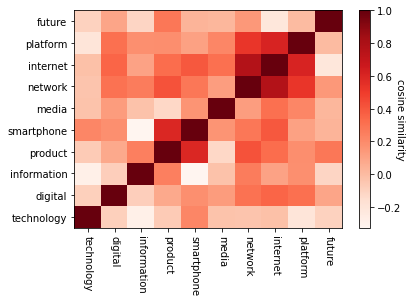

In [ ]:
fig, ax = plt.subplots()
hmap = ax.pcolor(heatmapMatrix, cmap='Reds')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrix.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrix.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(keywords, minor=False, rotation=270)
a = ax.set_yticklabels(keywords, minor=False)

In [ ]:
targetDocs = list(news_df_r25.index)[:10]

heatmapMatrixD = []

for tagOuter in targetDocs:
    column = []
    tagVec = news_D2V.docvecs[tagOuter].reshape(1, -1)
    for tagInner in targetDocs:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, news_D2V.docvecs[tagInner].reshape(1, -1))[0][0])
    heatmapMatrixD.append(column)

heatmapMatrixD = np.array(heatmapMatrixD)

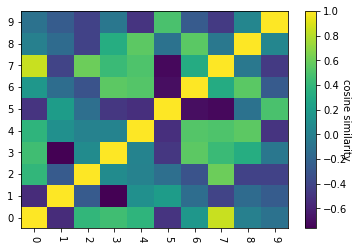

In [ ]:
fig, ax = plt.subplots()
hmap = ax.pcolor(heatmapMatrixD)
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrixD.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrixD.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(targetDocs, minor=False, rotation=270)
a = ax.set_yticklabels(targetDocs, minor=False)

In [ ]:
news_D2V.save('news_Doc_2_Vec')

In [ ]:
heatmapMatrixC = []

for tagOuter in targetDocs:
    column = []
    tagVec = news_D2V.docvecs[tagOuter].reshape(1, -1)
    for tagInner in keywords:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, news_D2V.docvecs[tagInner].reshape(1, -1))[0][0])
    heatmapMatrixC.append(column)
heatmapMatrixC = np.array(heatmapMatrixC)

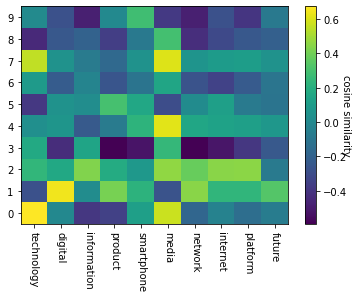

In [ ]:
fig, ax = plt.subplots()
hmap = ax.pcolor(heatmapMatrixC)
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrixC.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrixC.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(keywords, minor=False, rotation=270)
a = ax.set_yticklabels(targetDocs, minor=False)

In [ ]:
newstargetwords = ['effects', 'criminal', 'help', 'helpful', 'positive','negative', 
                    'good', 'bad', 'development', 'growth', 'future', 'present', 'past', 
                    'hidden', 'transparency', 'trust', 'rich', 'happy', 'fear', 'upcoming',
                   'coming', 'later', 'following', 'subsequent', 'new',
                   'finished', 'dead', 'old',
                    ]
                  
newstargetwords += ['technology', 'technologies', 'platforms', 'apps', 'child', 
                     'kids', 'women', 'men', 'market', 'country', 'economy', 'money', 
                     'health', 'science', 'internet', 'web', 'information', 
                     'hardware', 'software', 'computer', 'smartphone', 'facebook', 
                     'twitter', 'google', 'amazon', 'uber', 'alibaba', 'linkedin'
                     ]

wordsSubMatrix = []
for word in newstargetwords:
    wordsSubMatrix.append(news_D2V[word])
wordsSubMatrix = np.array(wordsSubMatrix)
wordsSubMatrix.shape

(56, 100)

In [ ]:
pca_words_news = sklearn.decomposition.PCA(n_components = 56).fit(wordsSubMatrix)
reduced_pca_data_news = pca_words_news.transform(wordsSubMatrix)
tsne_words_news = sklearn.manifold.TSNE(n_components = 2).fit_transform(reduced_pca_data_news)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


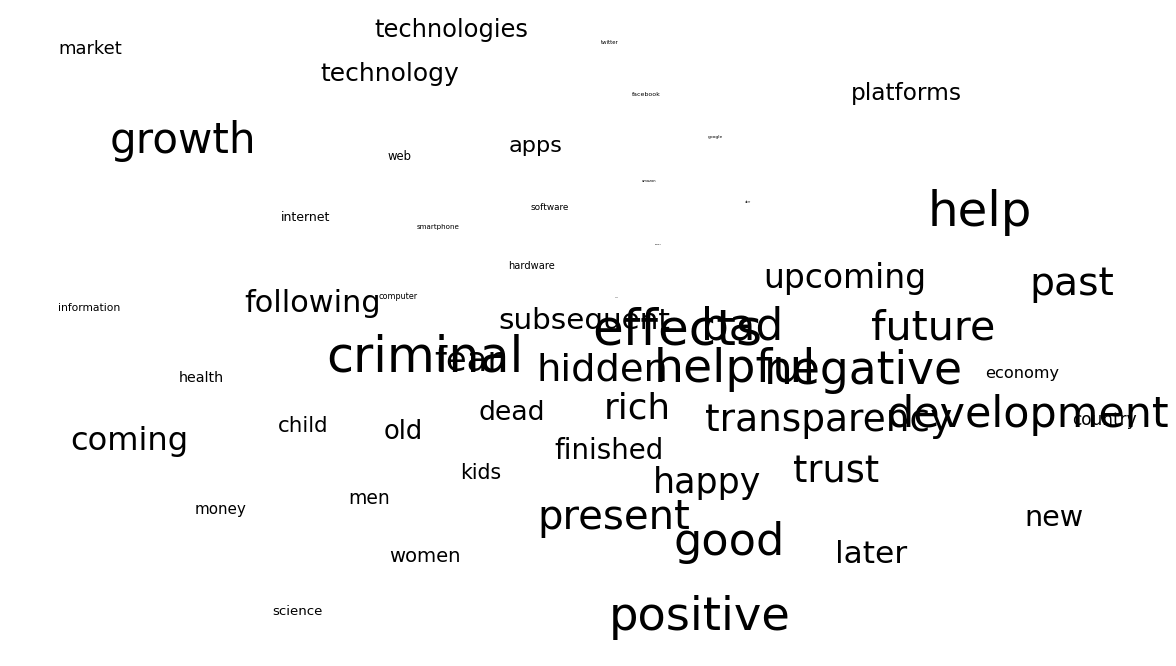

In [ ]:
fig = plt.figure(figsize = (20,12))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsne_words_news[:, 0], tsne_words_news[:, 1], alpha = 0) #Making the points invisible
for i, word in enumerate(newstargetwords):
    ax.annotate(word, (tsne_words_news[i, 0],tsne_words_news[i, 1]), size =  50 * (len(newstargetwords) - i) / len(newstargetwords))
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
def normalize(vector):
    normalized_vector = vector / np.linalg.norm(vector)
    return normalized_vector

def dimension(model, positives, negatives):
    diff = sum([normalize(model[x]) for x in positives]) - sum([normalize(model[y]) for y in negatives])
    return diff

In [ ]:
d_qualities = dimension(news_D2V, ['good','positive'], ['bad', 'negative'])
d_temporality = dimension(news_D2V,['future', 'upcoming','coming', 'later', 
                                    'following', 'subsequent', 'new',], 
                                  ['past', 'finished', 'dead', 'old'])

In [ ]:
w_technologies = ['technology', 'network', 'apps', 'platforms', 'blockchain', 'information', 'internet', 'web', 'hardware', 'software', 'computer', 'smartphone']
w_companies = ['facebook', 'twitter', 'google', 'amazon', 'alibaba', 'linkedin', 'uber']

In [ ]:
def makeDF(model, word_list):
    q = []
    t = []
    for word in word_list:
        q.append(sklearn.metrics.pairwise.cosine_similarity(news_D2V[word].reshape(1,-1), d_qualities.reshape(1,-1))[0][0])
        t.append(sklearn.metrics.pairwise.cosine_similarity(news_D2V[word].reshape(1,-1), d_temporality.reshape(1,-1))[0][0])
    df = pd.DataFrame({'qualities': q, 'temporality' : t}, index = word_list)
    return df

In [ ]:
technologies_df = makeDF(news_D2V, w_technologies) 

technologies_df

,qualities,temporality
technology,0.049381,0.070075
network,0.209437,0.109740
apps,-0.087547,-0.028445
platforms,0.030216,0.211126
blockchain,0.324836,0.245222
information,0.004452,0.057498
internet,0.020909,0.066167
web,-0.035654,0.118948
hardware,0.364309,0.067929
software,0.366374,0.085400


In [ ]:
companies_df = makeDF(news_D2V, w_companies) 

companies_df

,qualities,temporality
facebook,-0.181090,0.026030
twitter,-0.229986,0.054665
google,0.026438,0.156438
amazon,-0.101580,0.148609
alibaba,0.262707,0.168181
linkedin,-0.104930,0.102032
uber,0.118682,0.296535


In [ ]:
def Coloring(Series):
    x = Series.values
    y = x-x.min()
    z = y/y.max()
    c = list(plt.cm.coolwarm(z)) # podés cambiar coolwarm por cualquier cmap
    return c

def PlotDimension(ax,df, dim):
    ax.set_frame_on(False)
    ax.set_title(dim, fontsize = 20)
    colors = Coloring(df[dim])
    for i, word in enumerate(df.index):
        ax.annotate(word, (0, df[dim][i]), color = colors[i], alpha = 0.6, fontsize = 12)
    MaxY = df[dim].max()
    MinY = df[dim].min()
    plt.ylim(MinY,MaxY)
    plt.yticks(())
    plt.xticks(())

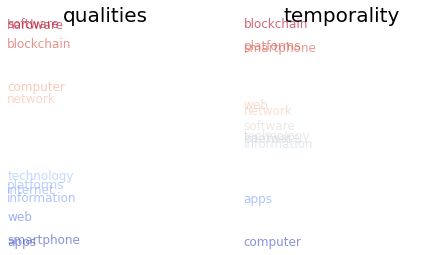

In [ ]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, technologies_df, 'qualities')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, technologies_df, 'temporality')
plt.show()

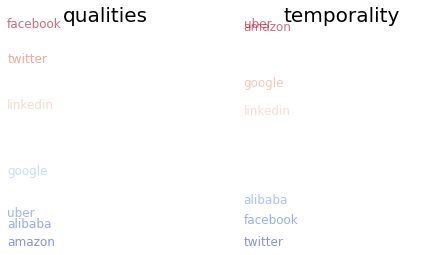

In [ ]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, companies_df, 'qualities')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, companies_df, 'temporality')
plt.show()

## Topic modeling with word embeddings

In [ ]:
#Discourse Atoms method https://arxiv.org/abs/1601.03764
from gensim.test.utils import datapath 
import re
import string, re
import cython

In [ ]:
# The ksvd package has a convenient Approximate k-SVD function.
!pip install ksvd

In [ ]:
from gensim import corpora, models, similarities #calc all similarities at once, from http://radimrehurek.com/gensim/tut3.html
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import KeyedVectors
from random import seed, sample
from ksvd import ApproximateKSVD #pip or conda install ksvd #this is key!

In [ ]:
import pickle

In [ ]:
import math

In [ ]:
# Load a gensim word2vec model
w2v = gensim.models.word2vec.Word2Vec.load('/content/drive/MyDrive/SOCI Computational Content Analysis/data/Final Project NOW/news_Doc_2_Vec')

#### k-SVD

We then perform a K-SVD on the word embedding matrix to learn topics in such a way where each word-vector is represented as a spare linear combination of topics. To generate a good representation of the original word vector space, we want to minimize the difference between our word vectors and the vectors generated as a linear combination of topics. 




In [ ]:
#### TRAIN MODEL:

#n_comp: Number of topics (i.e., atoms, or dictionary elements)
#n_nonzeros: Number of nonzero coefficients to target (how many atoms each word can load onto)
            
def do_aksvd(w2vmodel, n_comp, n_nonzeros, save=False, savelocation='/content/drive/MyDrive/SOCI Computational Content Analysis/data/Final Project NOW'): 
    #https://github.com/nel215/ksvd #takes about 2 min on Alina's laptop for 30 atoms 
    aksvd_t = ApproximateKSVD(n_components=n_comp, transform_n_nonzero_coefs=n_nonzeros) #also may adjuste n iter which is default at 10, and tolerance for error which is default at  tol=1e-6 #n_components is number of discourse atoms, since vocab size is smallish, keep this fewer. transform_n is the number of atoms (components) that a word can be a linear combo of
    dictionary_t = aksvd_t.fit(w2vmodel.wv.vectors).components_ # Dictionary is the matrix of discourse atoms. 
    alpha_t = aksvd_t.transform(w2vmodel.wv.vectors) #get the alphas, which are the "weights" of each word on a discourse atoms

    if save==True:
        outfile = open(str(savelocation) + '200d_' + str(n_comp) + 'comp' + str(n_nonzeros) + 'nonzeros_aksvd_nvdrsdf20','wb')
        pickle.dump(aksvd_t,outfile)
        outfile.close()
        
        outfile = open(str(savelocation) + '200d_' +str(n_comp) + 'comp' + str(n_nonzeros) + 'nonzeros_dictionary_nvdrsdf20','wb')
        pickle.dump(dictionary_t,outfile)
        outfile.close()
        
        outfile = open(str(savelocation) + '200d_' + str(n_comp) + 'comp' + str(n_nonzeros) + 'nonzeros_alpha_nvdrsdf20','wb')
        pickle.dump(alpha_t,outfile)
        outfile.close()
    return(dictionary_t, alpha_t)

Two quick quality checks. These are useful to choose the number of atoms in the dictionary (i.e., number of topics): $R^2$ and Topic Diversity

Useful to look at product of the two since $R^2$ tends to increase with higher # topics, as Topic Diversity decreases. Intuition: more topics can better explain the original semantic space, but also then these topics are less distinct from one another. As a result, we typically want a balance between the two.

In [ ]:
def reconst_qual(w2vmodel, dictionary_mat, alpha_mat):
    #reconstruct the word vectors
    reconstructed = alpha_mat.dot(dictionary_mat) #reconstruct word vectors and add back in mean(?). 
    #but note that reconstructed norm is still around 0-1, not 1, is that an issue?
    #e1 = norm(w2vmodel.wv.vectors - reconstructed) #total reconstruction error, 
    #larger means MORE error. norm as specified here takes frobenius norm of error 
    #matrix.


    #total VARIANCE in the data: sum of squares 
    squares3= w2vmodel.wv.vectors-np.mean(w2vmodel.wv.vectors, axis=1).reshape(-1,1) #https://dziganto.github.io/data%20science/linear%20regression/machine%20learning/python/Linear-Regression-101-Metrics/
    #sst3= np.sum([i.dot(i) for i in squares3] ) #same as below

    sst3= np.sum(np.square(squares3))


    #total sum of squared ERRORS/residuals
    e3= [reconstructed[i]-w2vmodel.wv.vectors[i] for i in range(0,len(w2vmodel.wv.vectors))]  #https://dziganto.github.io/data%20science/linear%20regression/machine%20learning/python/Linear-Regression-101-Metrics/
    #sse3= np.sum([i.dot(i) for i in e3] ) #same as below
    sse3= np.sum(np.square(e3))

    #R^2: 1- (SSE / SST )
    r2= 1- (sse3 /  sst3) #https://stats.stackexchange.com/questions/184603/in-pca-what-is-the-connection-between-explained-variance-and-squared-error


    #compute root mean square error
    rmse=  math.sqrt(np.mean(np.square(e3)))



    return(sse3, rmse, r2) #https://stats.stackexchange.com/questions/184603/in-pca-what-is-the-connection-between-explained-variance-and-squared-error

#### Inferring topics from document

We now use a similar approach to what we saw a little earlier, where we inverted our generative model to see which documents belong to which class - we do the same now, but with discourse atoms instead of the whole model. This process tells us the topic most likely to have generated a specific context (document). 



In [ ]:
#topic diversity (% unique words among total closest 25 words to each atom)
def topic_diversity(w2vmodel, dictionary_mat, top_n=25):

    topwords=[] #list of list, each innter list includes top N words in that topic

    for i in range(0, len(dictionary_mat)): #set to number of total topics
        topwords.extend([i[0] for i in w2vmodel.wv.similar_by_vector(dictionary_mat[i],topn=top_n)]) #set for top N words 
        #print(w2vmodel.wv.similar_by_vector(dictionary[i],topn=N))

    uniquewords= set(topwords)
    diversity = len(uniquewords)/len(topwords)
    return(diversity)

In [ ]:
#loading back in the model pieces if not already in

#infile = open('../data/aksvd_models/200d_150comp5nonzeros_dictionary_nvdrsdf20','rb')
#dictionary=pickle.load(infile)
#infile.close()

#infile = open('../data/aksvd_models/200d_150comp5nonzeros_aksvd_nvdrsdf20','rb')
#aksvd=pickle.load(infile)
#infile.close()

#infile = open('../data/aksvd_models/200d_150comp5nonzeros_alpha_nvdrsdf20','rb')
#alpha=pickle.load(infile)
#infile.close()

In [ ]:
dictionary, alpha = do_aksvd(w2v, 150, 5, save=True)

In [ ]:
topic_diversity(w2v, dictionary, top_n=25)

0.6037333333333333

In [ ]:
reconst_qual(w2v, dictionary, alpha)


(261.5175887856878, 0.014458451976670977, 0.9930150479025962)

In [ ]:
for i in range(0, len(dictionary)):
    print("Discourse_Atom " + str(i))
    print([i[0] for i in w2v.wv.similar_by_vector(dictionary[i],topn=25)]) #what are the most similar words to the Nth
    #print([i[0] for i in w2vmodel.wv.similar_by_vector(-dictionary[i],topn=25)]) #what are the most similar words to the Nth dicourse atom?
    print('\n')


Discourse_Atom 0
['assume', 'settings', 'samajwadi', 'column', 'ekurhuleni', 'curated', 'protections', 'hungry', 'demonstrating', 'races', 'browse', 'potholes', 'correctly', 'disabled', 'blogging', 'inaccuracy', 'pedestrians', 'executing', 'defunct', 'qinetiq', 'clicking', 'fairness', 'identities', 'counselling', 'habit']


Discourse_Atom 1
['held', 'boston', 'grace', 'boxers', 'maine', 'covering', 'suspend', 'promoter', 'agence', 'awaited', 'silent', 'quoting', 'feared', 'presse', 'minhaj', 'bishop', 'punishment', 'soshanguve', 'desist', 'd.c', 'critic', 'tradition', 'protesters', 'rhetoric', 'tribune']


Discourse_Atom 2
['igus', 'gautrain', 'j-20', 'orasure', 'turbine', 'sabric', 'soilbuild', 'silvertree', 'sfp', 'rubin', 'kiocl', 'lnp-1604', 'kobo', 'zee', 'naira', 'mn', 'milestones', 'juwai', 'expanders', 'eur', 'idt', 'modicon', 'approx', 'a2x', 'bookings']


Discourse_Atom 3
['cbn', 'pennsylvania', 'firstrand', 'billed', 'nnpc', 'citi', 'ihs', 'oracle', 'plc', 'dorsal', 'prospec

In [ ]:
# for a specific atom, e.g., 112th atom look at 25 most similar words:
w2v.wv.similar_by_vector(dictionary[112],topn=25)

[('dfa', 0.5086917281150818),
 ('digitization', 0.4873194098472595),
 ('abusive', 0.4666704535484314),
 ('ripple', 0.46354344487190247),
 ('nmra', 0.4604937434196472),
 ('demonstrators', 0.458835244178772),
 ('thoughts', 0.4436422288417816),
 ('volatile', 0.43526166677474976),
 ('insidious', 0.4334113597869873),
 ('hobart', 0.4286314845085144),
 ('hyperlinks', 0.42605268955230713),
 ('sunstar', 0.41877537965774536),
 ('flaring', 0.41862159967422485),
 ('malicious', 0.41608381271362305),
 ('seditious', 0.4130897521972656),
 ('comments', 0.4113146960735321),
 ('factual', 0.40913841128349304),
 ('nclt', 0.40727606415748596),
 ('modernizing', 0.4055968225002289),
 ('homeland', 0.3993036150932312),
 ('government', 0.39811939001083374),
 ('commend', 0.3889015316963196),
 ('disclaimer', 0.3865053653717041),
 ('determination', 0.38321682810783386),
 ('nspm', 0.37978386878967285)]

# Sentiment Analysis

In [ ]:
pip install transformers #from BERT

     |████████████████████████████████| 3.8 MB 2.7 MB/s 
     |████████████████████████████████| 6.5 MB 36.9 MB/s 
     |████████████████████████████████| 596 kB 41.7 MB/s 
     |████████████████████████████████| 895 kB 32.5 MB/s 
     |████████████████████████████████| 67 kB 2.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from transformers import pipeline

In [ ]:
nlp = pipeline("sentiment-analysis")
result = nlp("I love you")[0]
print(f"label: {result['label']}, with score: {round(result['score'], 4)}")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

label: POSITIVE, with score: 0.9999


In [ ]:
%%time 
#sentiment analysis 10% of the data
news_df_r10 = (
    news_df_r10
    .assign(sentiment = lambda x: x['body_clean'].apply(lambda s: nlp(s, max_length=512, truncation=True)))
    .assign(
         label = lambda x: x['sentiment'].apply(lambda s: (s[0]['label'])),
         score = lambda x: x['sentiment'].apply(lambda s: (s[0]['score']))
    )
)

CPU times: user 13min 20s, sys: 7.92 s, total: 13min 28s
Wall time: 13min 26s


In [ ]:
news_df_r10.to_excel("NOW corpora r10 sentiment analysis.xlsx")

## Regression models

I used a number of external measures of text, meaning that the measures were developed without any influence from this dataset. For length, that is a mathematical count of characters. For "facebook" and "future" it was strictly defined by the inclusion of this word in the dataset. For sentiment, it was from a BERT model not trained on the Internet Arguments Corpus.

In [ ]:
news_df_r10 = pd.read_excel('/content/drive/MyDrive/SOCI Computational Content Analysis/data/Final Project NOW/NOW corpora r10 sentiment analysis.xlsx')
news_df_r10

,Unnamed: 0,Unnamed: 0.1,tokenized_words,tokenized_sents,time,length_c,POS,body_clean,tokenized_sent,sentiment,label,score
0,0,1010,"['the', 'go', 'and', 'no', 'time', 'to', 'fini...",['the go and no time to finish that story righ...,200808,3983,"[('the', 'DT'), ('go', 'NN'), ('and', 'CC'), (...",the go and no time to finish that story right ...,['the go and no time to finish that story righ...,"[{'label': 'NEGATIVE', 'score': 0.996675252914...",NEGATIVE,0.996675
1,1,17159,"['read', 'most', 'read', 'denel', 'defends', '...",['read most read denel defends appointment o...,201401,2591,"[('read', 'VB'), ('most', 'JJS'), ('read', 'JJ...",read most read denel defends appointment of ...,['read most read denel defends appointment o...,"[{'label': 'NEGATIVE', 'score': 0.934854030609...",NEGATIVE,0.934854
2,2,4067,"['receives', 'mother', 's', 'kidney', 'part', ...",['receives mother s kidney part of liver in p...,200509,2460,"[('receives', 'NNS'), ('mother', 'CC'), ('s', ...",receives mother s kidney part of liver in pio...,['receives mother s kidney part of liver in p...,"[{'label': 'NEGATIVE', 'score': 0.957155883312...",NEGATIVE,0.957156
3,3,7776,"['things', 'to', 'do', 'over', 'the', 'weekend...",['things to do over the weekend of sept 89 dre...,200709,2341,"[('things', 'NNS'), ('to', 'TO'), ('do', 'VB')...",things to do over the weekend of sept 89 dress...,['things to do over the weekend of sept 89 dre...,"[{'label': 'POSITIVE', 'score': 0.992759466171...",POSITIVE,0.992759
4,4,2886,"['valuation', 'no', 'longer', 'key', 'in', 'th...",['valuation no longer key in the new era i att...,200108,3640,"[('valuation', 'NN'), ('no', 'RB'), ('longer',...",valuation no longer key in the new era i atten...,['valuation no longer key in the new era i att...,"[{'label': 'NEGATIVE', 'score': 0.989598155021...",NEGATIVE,0.989598
...,...,...,...,...,...,...,...,...,...,...,...,...
1008,1008,4246,"['cyril', 'ramaphosa', 'has', 'authorised', 't...",['cyril ramaphosa has authorised the special i...,200609,3645,"[('cyril', 'NN'), ('ramaphosa', 'NN'), ('has',...",cyril ramaphosa has authorised the special inv...,['cyril ramaphosa has authorised the special i...,"[{'label': 'NEGATIVE', 'score': 0.997480452060...",NEGATIVE,0.997480
1009,1009,14975,"['struggled', 'with', 'the', 'decision', 'to',...",['struggled with the decision to work with the...,201201,3255,"[('struggled', 'VBN'), ('with', 'IN'), ('the',...",struggled with the decision to work with the c...,['struggled with the decision to work with the...,"[{'label': 'NEGATIVE', 'score': 0.996708869934...",NEGATIVE,0.996709
1010,1010,11568,"['four', 'most', 'promising', 'applications', ...",['four most promising applications of ai edito...,200709,3548,"[('four', 'CD'), ('most', 'RBS'), ('promising'...",four most promising applications of ai editor ...,['four most promising applications of ai edito...,"[{'label': 'POSITIVE', 'score': 0.928354680538...",POSITIVE,0.928355
1011,1011,6452,"['delhi', 'do', 'you', 'want', 'to', 'contribu...",['delhi do you want to contribute towards na...,201809,2500,"[('delhi', 'NN'), ('do', 'VBP'), ('you', 'PRP'...",delhi do you want to contribute towards nati...,['delhi do you want to contribute towards na...,"[{'label': 'NEGATIVE', 'score': 0.959118306636...",NEGATIVE,0.959118


In [ ]:
def get_signed_score(df):
    label = df[10]
    score = df[11]
    sg = 1 if label == 'POSITIVE' else -1
    return sg * score

news_df_r10['signed_score'] = news_df_r10.apply(get_signed_score, axis=1)
news_df_r10

,Unnamed: 0,Unnamed: 0.1,tokenized_words,tokenized_sents,time,length_c,POS,body_clean,tokenized_sent,sentiment,label,score,signed_score,facebook,future
0,0,1010,"['the', 'go', 'and', 'no', 'time', 'to', 'fini...",['the go and no time to finish that story righ...,200808,3983,"[('the', 'DT'), ('go', 'NN'), ('and', 'CC'), (...",the go and no time to finish that story right ...,['the go and no time to finish that story righ...,"[{'label': 'NEGATIVE', 'score': 0.996675252914...",NEGATIVE,0.996675,-0.996675,0,0
1,1,17159,"['read', 'most', 'read', 'denel', 'defends', '...",['read most read denel defends appointment o...,201401,2591,"[('read', 'VB'), ('most', 'JJS'), ('read', 'JJ...",read most read denel defends appointment of ...,['read most read denel defends appointment o...,"[{'label': 'NEGATIVE', 'score': 0.934854030609...",NEGATIVE,0.934854,-0.934854,0,0
2,2,4067,"['receives', 'mother', 's', 'kidney', 'part', ...",['receives mother s kidney part of liver in p...,200509,2460,"[('receives', 'NNS'), ('mother', 'CC'), ('s', ...",receives mother s kidney part of liver in pio...,['receives mother s kidney part of liver in p...,"[{'label': 'NEGATIVE', 'score': 0.957155883312...",NEGATIVE,0.957156,-0.957156,0,0
3,3,7776,"['things', 'to', 'do', 'over', 'the', 'weekend...",['things to do over the weekend of sept 89 dre...,200709,2341,"[('things', 'NNS'), ('to', 'TO'), ('do', 'VB')...",things to do over the weekend of sept 89 dress...,['things to do over the weekend of sept 89 dre...,"[{'label': 'POSITIVE', 'score': 0.992759466171...",POSITIVE,0.992759,0.992759,0,0
4,4,2886,"['valuation', 'no', 'longer', 'key', 'in', 'th...",['valuation no longer key in the new era i att...,200108,3640,"[('valuation', 'NN'), ('no', 'RB'), ('longer',...",valuation no longer key in the new era i atten...,['valuation no longer key in the new era i att...,"[{'label': 'NEGATIVE', 'score': 0.989598155021...",NEGATIVE,0.989598,-0.989598,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,1008,4246,"['cyril', 'ramaphosa', 'has', 'authorised', 't...",['cyril ramaphosa has authorised the special i...,200609,3645,"[('cyril', 'NN'), ('ramaphosa', 'NN'), ('has',...",cyril ramaphosa has authorised the special inv...,['cyril ramaphosa has authorised the special i...,"[{'label': 'NEGATIVE', 'score': 0.997480452060...",NEGATIVE,0.997480,-0.997480,1,0
1009,1009,14975,"['struggled', 'with', 'the', 'decision', 'to',...",['struggled with the decision to work with the...,201201,3255,"[('struggled', 'VBN'), ('with', 'IN'), ('the',...",struggled with the decision to work with the c...,['struggled with the decision to work with the...,"[{'label': 'NEGATIVE', 'score': 0.996708869934...",NEGATIVE,0.996709,-0.996709,0,1
1010,1010,11568,"['four', 'most', 'promising', 'applications', ...",['four most promising applications of ai edito...,200709,3548,"[('four', 'CD'), ('most', 'RBS'), ('promising'...",four most promising applications of ai editor ...,['four most promising applications of ai edito...,"[{'label': 'POSITIVE', 'score': 0.928354680538...",POSITIVE,0.928355,0.928355,0,1
1011,1011,6452,"['delhi', 'do', 'you', 'want', 'to', 'contribu...",['delhi do you want to contribute towards na...,201809,2500,"[('delhi', 'NN'), ('do', 'VBP'), ('you', 'PRP'...",delhi do you want to contribute towards nati...,['delhi do you want to contribute towards na...,"[{'label': 'NEGATIVE', 'score': 0.959118306636...",NEGATIVE,0.959118,-0.959118,1,0


In [ ]:
news_df_r10['facebook'] = news_df_r10['body_clean'].apply(lambda t: int('facebook' in t.lower()))
news_df_r10

,Unnamed: 0,Unnamed: 0.1,tokenized_words,tokenized_sents,time,length_c,POS,body_clean,tokenized_sent,sentiment,label,score,signed_score,facebook,future
0,0,1010,"['the', 'go', 'and', 'no', 'time', 'to', 'fini...",['the go and no time to finish that story righ...,200808,3983,"[('the', 'DT'), ('go', 'NN'), ('and', 'CC'), (...",the go and no time to finish that story right ...,['the go and no time to finish that story righ...,"[{'label': 'NEGATIVE', 'score': 0.996675252914...",NEGATIVE,0.996675,-0.996675,0,0
1,1,17159,"['read', 'most', 'read', 'denel', 'defends', '...",['read most read denel defends appointment o...,201401,2591,"[('read', 'VB'), ('most', 'JJS'), ('read', 'JJ...",read most read denel defends appointment of ...,['read most read denel defends appointment o...,"[{'label': 'NEGATIVE', 'score': 0.934854030609...",NEGATIVE,0.934854,-0.934854,0,0
2,2,4067,"['receives', 'mother', 's', 'kidney', 'part', ...",['receives mother s kidney part of liver in p...,200509,2460,"[('receives', 'NNS'), ('mother', 'CC'), ('s', ...",receives mother s kidney part of liver in pio...,['receives mother s kidney part of liver in p...,"[{'label': 'NEGATIVE', 'score': 0.957155883312...",NEGATIVE,0.957156,-0.957156,0,0
3,3,7776,"['things', 'to', 'do', 'over', 'the', 'weekend...",['things to do over the weekend of sept 89 dre...,200709,2341,"[('things', 'NNS'), ('to', 'TO'), ('do', 'VB')...",things to do over the weekend of sept 89 dress...,['things to do over the weekend of sept 89 dre...,"[{'label': 'POSITIVE', 'score': 0.992759466171...",POSITIVE,0.992759,0.992759,0,0
4,4,2886,"['valuation', 'no', 'longer', 'key', 'in', 'th...",['valuation no longer key in the new era i att...,200108,3640,"[('valuation', 'NN'), ('no', 'RB'), ('longer',...",valuation no longer key in the new era i atten...,['valuation no longer key in the new era i att...,"[{'label': 'NEGATIVE', 'score': 0.989598155021...",NEGATIVE,0.989598,-0.989598,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,1008,4246,"['cyril', 'ramaphosa', 'has', 'authorised', 't...",['cyril ramaphosa has authorised the special i...,200609,3645,"[('cyril', 'NN'), ('ramaphosa', 'NN'), ('has',...",cyril ramaphosa has authorised the special inv...,['cyril ramaphosa has authorised the special i...,"[{'label': 'NEGATIVE', 'score': 0.997480452060...",NEGATIVE,0.997480,-0.997480,1,0
1009,1009,14975,"['struggled', 'with', 'the', 'decision', 'to',...",['struggled with the decision to work with the...,201201,3255,"[('struggled', 'VBN'), ('with', 'IN'), ('the',...",struggled with the decision to work with the c...,['struggled with the decision to work with the...,"[{'label': 'NEGATIVE', 'score': 0.996708869934...",NEGATIVE,0.996709,-0.996709,0,1
1010,1010,11568,"['four', 'most', 'promising', 'applications', ...",['four most promising applications of ai edito...,200709,3548,"[('four', 'CD'), ('most', 'RBS'), ('promising'...",four most promising applications of ai editor ...,['four most promising applications of ai edito...,"[{'label': 'POSITIVE', 'score': 0.928354680538...",POSITIVE,0.928355,0.928355,0,1
1011,1011,6452,"['delhi', 'do', 'you', 'want', 'to', 'contribu...",['delhi do you want to contribute towards na...,201809,2500,"[('delhi', 'NN'), ('do', 'VBP'), ('you', 'PRP'...",delhi do you want to contribute towards nati...,['delhi do you want to contribute towards na...,"[{'label': 'NEGATIVE', 'score': 0.959118306636...",NEGATIVE,0.959118,-0.959118,1,0


In [ ]:
news_df_r10['future'] = news_df_r10['body_clean'].apply(lambda t: int('future' in t.lower()))
news_df_r10

,Unnamed: 0,Unnamed: 0.1,tokenized_words,tokenized_sents,time,length_c,POS,body_clean,tokenized_sent,sentiment,label,score,signed_score,facebook,future
0,0,1010,"['the', 'go', 'and', 'no', 'time', 'to', 'fini...",['the go and no time to finish that story righ...,200808,3983,"[('the', 'DT'), ('go', 'NN'), ('and', 'CC'), (...",the go and no time to finish that story right ...,['the go and no time to finish that story righ...,"[{'label': 'NEGATIVE', 'score': 0.996675252914...",NEGATIVE,0.996675,-0.996675,0,0
1,1,17159,"['read', 'most', 'read', 'denel', 'defends', '...",['read most read denel defends appointment o...,201401,2591,"[('read', 'VB'), ('most', 'JJS'), ('read', 'JJ...",read most read denel defends appointment of ...,['read most read denel defends appointment o...,"[{'label': 'NEGATIVE', 'score': 0.934854030609...",NEGATIVE,0.934854,-0.934854,0,0
2,2,4067,"['receives', 'mother', 's', 'kidney', 'part', ...",['receives mother s kidney part of liver in p...,200509,2460,"[('receives', 'NNS'), ('mother', 'CC'), ('s', ...",receives mother s kidney part of liver in pio...,['receives mother s kidney part of liver in p...,"[{'label': 'NEGATIVE', 'score': 0.957155883312...",NEGATIVE,0.957156,-0.957156,0,0
3,3,7776,"['things', 'to', 'do', 'over', 'the', 'weekend...",['things to do over the weekend of sept 89 dre...,200709,2341,"[('things', 'NNS'), ('to', 'TO'), ('do', 'VB')...",things to do over the weekend of sept 89 dress...,['things to do over the weekend of sept 89 dre...,"[{'label': 'POSITIVE', 'score': 0.992759466171...",POSITIVE,0.992759,0.992759,0,0
4,4,2886,"['valuation', 'no', 'longer', 'key', 'in', 'th...",['valuation no longer key in the new era i att...,200108,3640,"[('valuation', 'NN'), ('no', 'RB'), ('longer',...",valuation no longer key in the new era i atten...,['valuation no longer key in the new era i att...,"[{'label': 'NEGATIVE', 'score': 0.989598155021...",NEGATIVE,0.989598,-0.989598,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,1008,4246,"['cyril', 'ramaphosa', 'has', 'authorised', 't...",['cyril ramaphosa has authorised the special i...,200609,3645,"[('cyril', 'NN'), ('ramaphosa', 'NN'), ('has',...",cyril ramaphosa has authorised the special inv...,['cyril ramaphosa has authorised the special i...,"[{'label': 'NEGATIVE', 'score': 0.997480452060...",NEGATIVE,0.997480,-0.997480,1,0
1009,1009,14975,"['struggled', 'with', 'the', 'decision', 'to',...",['struggled with the decision to work with the...,201201,3255,"[('struggled', 'VBN'), ('with', 'IN'), ('the',...",struggled with the decision to work with the c...,['struggled with the decision to work with the...,"[{'label': 'NEGATIVE', 'score': 0.996708869934...",NEGATIVE,0.996709,-0.996709,0,1
1010,1010,11568,"['four', 'most', 'promising', 'applications', ...",['four most promising applications of ai edito...,200709,3548,"[('four', 'CD'), ('most', 'RBS'), ('promising'...",four most promising applications of ai editor ...,['four most promising applications of ai edito...,"[{'label': 'POSITIVE', 'score': 0.928354680538...",POSITIVE,0.928355,0.928355,0,1
1011,1011,6452,"['delhi', 'do', 'you', 'want', 'to', 'contribu...",['delhi do you want to contribute towards na...,201809,2500,"[('delhi', 'NN'), ('do', 'VBP'), ('you', 'PRP'...",delhi do you want to contribute towards nati...,['delhi do you want to contribute towards na...,"[{'label': 'NEGATIVE', 'score': 0.959118306636...",NEGATIVE,0.959118,-0.959118,1,0


In [ ]:
news_df_r10['signed_score']

0      -0.996675
1      -0.934854
2      -0.957156
3       0.992759
4      -0.989598
          ...   
1008   -0.997480
1009   -0.996709
1010    0.928355
1011   -0.959118
1012   -0.998030
Name: signed_score, Length: 1013, dtype: float64

Time is not significant, but facebook and future are. 

In [ ]:
y = news_df_r10['signed_score']
X_cols = ['future', 'facebook', 'time']
X = sm.add_constant(news_df_r10[X_cols])

lm2 = sm.OLS(y,X).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:           signed_score   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     7.355
Date:                Wed, 16 Mar 2022   Prob (F-statistic):           7.05e-05
Time:                        22:51:10   Log-Likelihood:                -1326.9
No. Observations:                1013   AIC:                             2662.
Df Residuals:                    1009   BIC:                             2682.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.2889     11.369     -0.465      0.6

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
from statsmodels.formula.api import ols

fit = ols('signed_score ~ time + C(facebook) + C(future)', data=news_df_r10).fit() 

print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:           signed_score   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     7.355
Date:                Wed, 16 Mar 2022   Prob (F-statistic):           7.05e-05
Time:                        22:58:33   Log-Likelihood:                -1326.9
No. Observations:                1013   AIC:                             2662.
Df Residuals:                    1009   BIC:                             2682.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -5.2889     11.369  

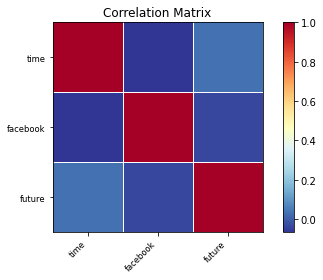

In [ ]:
corr_matrix = np.corrcoef(news_df_r10[X_cols].T)
smg.plot_corr(corr_matrix, xnames=X_cols)
plt.show()

#we don't see a lot of collinearity

I will test the effect of time ("time") on the positivity of the news article ("signed_score") mediated by the mention of facebook in the news article ("facebook").

ACME (treated) is not statisfically significant, thus suggesting no mediation. Additionally, the ADE suggests that there is evidence of a direct effect.

In [ ]:
# Mediation analysis
y = news_df_r10['time']
X_cols = ['facebook']
X = sm.add_constant(news_df_r10[X_cols])
mediator_model = sm.OLS(y,X)

y = news_df_r10['signed_score']
X_cols = ['facebook','length_c','future','time']
X = sm.add_constant(news_df_r10[X_cols])
outcome_model = sm.OLS(y,X)

med = Mediation(outcome_model=outcome_model, mediator_model=mediator_model,
                exposure='facebook', mediator='time').fit()
med.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,Estimate,Lower CI bound,Upper CI bound,P-value
ACME (control),-0.003156,-0.021015,0.012808,0.682
ACME (treated),-0.003156,-0.021015,0.012808,0.682
ADE (control),-0.304997,-0.497936,-0.097348,0.004
ADE (treated),-0.304997,-0.497936,-0.097348,0.004
Total effect,-0.308153,-0.499955,-0.102951,0.004
Prop. mediated (control),0.007447,-0.046611,0.095115,0.686
Prop. mediated (treated),0.007447,-0.046611,0.095115,0.686
ACME (average),-0.003156,-0.021015,0.012808,0.682
ADE (average),-0.304997,-0.497936,-0.097348,0.004
Prop. mediated (average),0.007447,-0.046611,0.095115,0.686


#Text Generation

In [ ]:
from transformers import AutoModelWithLMHead, AutoTokenizer

tokenizer_gpt = AutoTokenizer.from_pretrained("gpt2")
model_gpt = AutoModelWithLMHead.from_pretrained("gpt2")

Downloading:   0%|          | 0.00/665 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/0.99M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/transformers/models/auto/modeling_auto.py:882: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  FutureWarning,


Downloading:   0%|          | 0.00/523M [00:00<?, ?B/s]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_text, test_text = train_test_split(news_df_r10['body_clean'], test_size=0.2)

In [ ]:
train_text.head()

690    iphone xs  xs max and the xr launch was apprec...
518     mcilroy share bmw lead tiger woods scored his...
400    february 17  2017  it had 0 buys  and 9 sales ...
324    karl  it ll be a great day when a prime minist...
384    is an exceptionallylow level of bastadry  but ...
Name: body_clean, dtype: object

In [ ]:
train_text.to_frame().to_csv(r'train_news', header=None, index=None, sep=' ', mode='a')
test_text.to_frame().to_csv(r'test_news', header=None, index=None, sep=' ', mode='a')

With GTP-2 trained with other data

In [ ]:
tokenizer_gpt = AutoTokenizer.from_pretrained("gpt2")
model_gpt = AutoModelWithLMHead.from_pretrained("gpt2")

/usr/local/lib/python3.7/dist-packages/transformers/models/auto/modeling_auto.py:882: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  FutureWarning,


In [ ]:
sequence = "The future of technology will be"

input = tokenizer_gpt.encode(sequence, return_tensors="pt")
generated = model_gpt.generate(input, max_length=50)

resulting_string = tokenizer_gpt.decode(generated.tolist()[0])
print(resulting_string)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


The future of technology will be determined by the future of the human race.

The future of technology will be determined by the future of the human race.

The future of technology will be determined by the future of the human race.



In [ ]:
sequence = "Facebook is guilty of"

input = tokenizer_gpt.encode(sequence, return_tensors="pt")
generated = model_gpt.generate(input, max_length=50)

resulting_string = tokenizer_gpt.decode(generated.tolist()[0])
print(resulting_string)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Facebook is guilty of a crime.

The court heard that the defendant, who was a member of the public, was a member of the public at the time of the incident.

The court heard that the defendant was a member of the


In [ ]:
sequence = "The utopian view of technology is associated with"

input = tokenizer_gpt.encode(sequence, return_tensors="pt")
generated = model_gpt.generate(input, max_length=50)

resulting_string = tokenizer_gpt.decode(generated.tolist()[0])
print(resulting_string)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


The utopian view of technology is associated with the idea that the future is not yet there. The future is not yet there. The future is not yet there. The future is not yet there. The future is not yet there. The future is not


In [ ]:
sequence = "Social imaginaries about technology are associated with"

input = tokenizer_gpt.encode(sequence, return_tensors="pt")
generated = model_gpt.generate(input, max_length=50)

resulting_string = tokenizer_gpt.decode(generated.tolist()[0])
print(resulting_string)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Social imaginaries about technology are associated with the idea that the world is a better place because of technology.

The idea that technology is a better place is not new. The idea that technology is a better place is not new. The idea that


with news dataset trained

In [ ]:
!!wget https://raw.githubusercontent.com/UChicago-Computational-Content-Analysis/Homework-Notebooks/main/week-8/run_language_modeling_gpt.py

['--2022-03-16 17:16:50--  https://raw.githubusercontent.com/UChicago-Computational-Content-Analysis/Homework-Notebooks/main/week-8/run_language_modeling_gpt.py',
 'Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...',
 'Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.',
 'HTTP request sent, awaiting response... 200 OK',
 'Length: 28332 (28K) [text/plain]',
 'Saving to: ‘run_language_modeling_gpt.py’',
 '',
 '',
 '          run_langu   0%[                    ]       0  --.-KB/s               ',
 'run_language_modeli 100%[===================>]  27.67K  --.-KB/s    in 0.006s  ',
 '',
 '2022-03-16 17:16:50 (4.80 MB/s) - ‘run_language_modeling_gpt.py’ saved [28332/28332]',
 '']

In [ ]:
!!wget https://raw.githubusercontent.com/UChicago-Computational-Content-Analysis/Homework-Notebooks/main/week-8/run_generation.py

['--2022-03-16 17:13:49--  https://raw.githubusercontent.com/UChicago-Computational-Content-Analysis/Homework-Notebooks/main/week-8/run_generation.py',
 'Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...',
 'Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.',
 'HTTP request sent, awaiting response... 200 OK',
 'Length: 10123 (9.9K) [text/plain]',
 'Saving to: ‘run_generation.py’',
 '',
 '',
 'run_generation.py     0%[                    ]       0  --.-KB/s               ',
 'run_generation.py   100%[===================>]   9.89K  --.-KB/s    in 0s      ',
 '',
 '2022-03-16 17:13:49 (58.6 MB/s) - ‘run_generation.py’ saved [10123/10123]',
 '']

In [ ]:
!python run_language_modeling_gpt.py --per_gpu_train_batch_size=1 --output_dir=output_news_gpt --model_type=gpt2 --model_name_or_path=gpt2 --do_train --train_data_file=train_news --do_eval --eval_data_file=test_news

03/16/2022 17:21:28 - WARNING - __main__ -   Process rank: -1, device: cpu, n_gpu: 0, distributed training: False, 16-bits training: False
03/16/2022 17:21:32 - INFO - __main__ -   Training/evaluation parameters Namespace(adam_epsilon=1e-08, block_size=1024, cache_dir='', config_name='', device=device(type='cpu'), do_eval=True, do_lower_case=False, do_train=True, eval_all_checkpoints=False, eval_data_file='test_news', evaluate_during_training=False, fp16=False, fp16_opt_level='O1', gradient_accumulation_steps=1, learning_rate=5e-05, local_rank=-1, logging_steps=50, max_grad_norm=1.0, max_steps=-1, mlm=False, mlm_probability=0.15, model_name_or_path='gpt2', model_type='gpt2', n_gpu=0, no_cuda=False, num_train_epochs=1.0, num_warmup_steps=0, output_dir='output_news_gpt', overwrite_cache=False, overwrite_output_dir=False, per_gpu_eval_batch_size=1, per_gpu_train_batch_size=1, save_steps=50, save_total_limit=None, seed=42, server_ip='', server_port='', tokenizer_name='', train_data_file='t

In [ ]:
!python run_generation.py --model_type=gpt2 --model_name_or_path=output_news

# Time vs word frequency

In [ ]:
from collections import Counter

In [ ]:
time_wordf_df = pd.DataFrame()
time_wordf_df['year'] = news_df_reduced['date'].apply(lambda x: int(str(x).split('-')[0]))
time_wordf_df['tokenized_words'] = news_df_reduced['tokenized_words']

In [ ]:
years = list(set(news_df_reduced['date'].apply(lambda x: int(str(x).split('-')[0]))))
years_tokens_d = {y: time_wordf_df[time_wordf_df['year'] == y]['tokenized_words'].sum() for y in years}

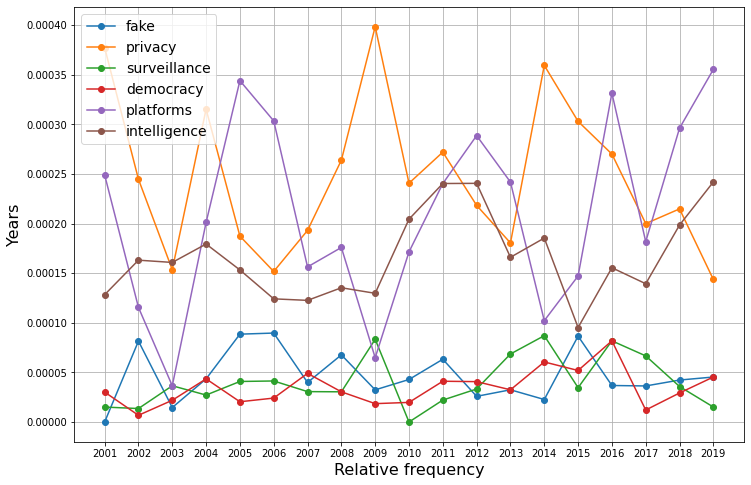

In [ ]:
def get_relative_freq(word, year):
    return Counter(years_tokens_d[year])[word]/len(years_tokens_d[year])

words = ['fake', 'privacy', 'surveillance', 'democracy', 'platforms', 'intelligence']

plt.figure(figsize=(12, 8))
for w in words:
    freq = [get_relative_freq(w, y) for y in years]
    plt.plot(years, freq, '-o', label=w)

plt.xlabel('Relative frequency', fontsize=16)
plt.ylabel('Years', fontsize=16)
plt.xticks(years)


plt.legend(fontsize=14)
plt.grid()

In [ ]:
time_wordf_df['year']

0        2001
1        2001
4        2001
6        2001
7        2001
         ... 
17549    2011
17550    2011
17552    2016
17553    2016
17555    2017
Name: year, Length: 10132, dtype: int64

In [ ]:
news_df_reduced

,Unnamed: 0,length,date,country,publisher,body,tokenized_words,normalized_words,tokenized_sents,normalized_sents,time,length_w,length_c,body_clean
0,0,362,2001-08-17,GB,90min,reports emerged on Monday night over Barcelona...,"[reports, emerged, on, monday, night, over, ba...","['conflicting', 'reports', 'emerged', 'monday'...","[[reports, emerged, on, monday, night, over, b...","[['report', 'emerge', 'monday', 'night', 'barc...",200108,362,2189,reports emerged on monday night over barcelona...
1,1,214,2001-08-17,GB,Telegraph.co.uk,'s value passes $800bn as it dispels fears of ...,"['s, value, passes, $, 800bn, as, it, dispels,...","['apple', 'value', 'passes', '$', '800bn', 'di...","[['s, value, passes, $, 800bn, as, it, dispels...","[['value', 'pass', '$', '800bn', 'dispel', 'fe...",200108,214,1255,s value passes 800bn as it dispels fears of ip...
4,4,417,2001-08-17,GB,Heat,"website uses cookies . We use technologies , s...","[website, uses, cookies, ., we, use, technolog...","['website', 'uses', 'cookies', 'use', 'technol...","[[website, uses, cookies, .], [we, use, techno...","[['website', 'use', 'cooky'], ['use', 'technol...",200108,417,2331,website uses cookies we use technologies suc...
6,6,219,2001-08-17,GB,Empire,"website uses cookies . We use technologies , s...","[website, uses, cookies, ., we, use, technolog...","['website', 'uses', 'cookies', 'use', 'technol...","[[website, uses, cookies, .], [we, use, techno...","[['website', 'use', 'cooky'], ['use', 'technol...",200108,219,1296,website uses cookies we use technologies suc...
7,7,243,2001-08-17,GB,Press Release Rocket (press release),"1994 , Zymo Research has provided reliable , i...","[1994, ,, zymo, research, has, provided, relia...","['zymo', 'research', 'provided', 'reliable', '...","[[1994, ,, zymo, research, has, provided, reli...","[['zymo', 'research', 'provide', 'reliable', '...",200108,243,1550,1994 zymo research has provided reliable inn...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17549,17549,555,2011-01-19,JM,"Government of Jamaica, Jamaica Information Ser...","Highlights Minister of Transport and Mining , ...","[highlights, minister, of, transport, and, min...","['story', 'highlights', 'minister', 'transport...","[[highlights, minister, of, transport, and, mi...","[['highlight', 'minister', 'transport', 'mine'...",201101,555,3655,highlights minister of transport and mining h...
17550,17550,448,2011-01-19,JM,Loop News Jamaica,tells HEART Trust to intensify training of BPO...,"[tells, heart, trust, to, intensify, training,...","['holness', 'tells', 'heart', 'trust', 'intens...","[[tells, heart, trust, to, intensify, training...","[['tell', 'heart', 'trust', 'intensify', 'trai...",201101,448,2554,tells heart trust to intensify training of bpo...
17552,17552,221,2016-01-19,JM,Loop News Jamaica,"When we first started , we got jobs simple job...","[when, we, first, started, ,, we, got, jobs, s...","['started', 'got', 'jobs', 'simple', 'jobs', '...","[[when, we, first, started, ,, we, got, jobs, ...","[['start', 'get', 'job', 'simple', 'job', 'lik...",201601,221,1299,when we first started we got jobs simple jobs...
17553,17553,580,2016-01-19,JM,"Government of Jamaica, Jamaica Information Ser...",Highlights The Government is to table a Bill e...,"[highlights, the, government, is, to, table, a...","['story', 'highlights', 'government', 'table',...","[[highlights, the, government, is, to, table, ...","[['highlight'], ['government', 'table', 'bill'...",201601,580,3571,highlights the government is to table a bill e...
